In [9]:
# first attempt at opening sylvias data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import matplotlib.lines as mlines
import scipy.io
import h5py 
import statistics as st
from astropy.io import ascii
import sys
import imp
import datetime
from itertools import chain
import subprocess
from tqdm import tqdm
sys.path.insert(0, '/Users/H/INVERSE/Python/')
import imageio

import freedrift
imp.reload(freedrift)

<module 'freedrift' from '/Users/H/INVERSE/Python/freedrift.py'>

In [10]:
location =  % pwd
location

'/Users/H/INVERSE/Sylvia_data'

In [11]:
miz_itpv_d150 = scipy.io.loadmat('miz_itpv_d150.mat')
struct = miz_itpv_d150['d150']
u= struct['vel1'][0,1]
v= struct['vel2'][0,1]
uice = struct['uice'][0,1]
vice = struct['vice'][0,1]
uocn = struct['u'][0,1]
vocn = struct['v'][0,1]
depth = struct['depth'][0,1]
tstart = struct['tstart'][0,1]
tstop = struct['tstop'][0,1]
lat = struct['lat'][0,1]
lon = struct['lon'][0,1]
qcflag_vel = struct['qcflag_vel'][0,1]
velmask    = struct['velmask'][0,1]

In [12]:
miz_itpv_d5 = h5py.File('miz_itpv_d5.mat','r')
struct = miz_itpv_d5['d5']
u_5= miz_itpv_d5[struct['vel1'][1,0]].value
v_5= miz_itpv_d5[struct['vel2'][1,0]].value
uice_5 = miz_itpv_d5[struct['uice'][1,0]].value
vice_5 = miz_itpv_d5[struct['vice'][1,0]].value
uocn_5 = miz_itpv_d5[struct['u'][1,0]].value
vocn_5 = miz_itpv_d5[struct['v'][1,0]].value
# depth = struct['depth'][1,0]
tstart_5 = miz_itpv_d5[struct['tstart'][1,0]].value
tstop_5 = miz_itpv_d5[struct['tstop'][1,0]].value
lat_5 = miz_itpv_d5[struct['lat'][1,0]].value
lon_5 = miz_itpv_d5[struct['lon'][1,0]].value
qcflag_vel_5 = miz_itpv_d5[struct['qcflag_vel'][1,0]].value
velmask_5    = miz_itpv_d5[struct['velmask'][1,0]].value

miz_itpv_d5 = h5py.File('miz_itpv_d5more.mat','r')
struct = miz_itpv_d5['d5']
draft= miz_itpv_d5[struct['draft'][1,0]].value
draft_min = np.sort(draft[draft[:,0]>0.1])[-1]
draft = np.maximum(draft,draft_min)

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in maximum


In [13]:
miz_cdrag = scipy.io.loadmat('miz_cdrag.mat')
struct = miz_cdrag['cdrag']
tuse_cd = struct['tuse'][0,1]
refdepth= struct['refdepth'][0,1]
cd6     = struct['cd6'][0,1]
cdgeo   = struct['cdgeo'][0,1]
turn6   = struct['turn6'][0,1]
turngeo = struct['turngeo'][0,1]

In [14]:
np.shape(u),np.shape(u_5),np.shape(refdepth)

((270, 1659), (708, 4500), (1, 708))

In [15]:
datetime.datetime.toordinal(datetime.datetime(1971,1,1))

719528

In [16]:
# CORRECT TIME CONVERSION DON"T ADJUST
d150_tstart = []
for i in range(np.size(tstart)):
    temp_try = datetime.datetime.utcfromtimestamp((tstart[0][i]-1-719528)*3600*24)
    d150_tstart.append(temp_try)
d5_tstart = []
for i in range(np.size(tstart_5)):
    temp_try = datetime.datetime.utcfromtimestamp((tstart_5[i]-1-719528)*3600*24)
    d5_tstart.append(temp_try)
cd_tuse = []
for i in range(np.size(tuse_cd)):
    if not np.isnan(tuse_cd[0,i]):
        temp_try = datetime.datetime.utcfromtimestamp((tuse_cd[0,i]-1-719528)*3600*24)
        cd_tuse.append(temp_try)
    else:
        cd_tuse.append(np.nan)

In [17]:
aws_02_data = []
length = 0
with open('AWS/AWS_02.txt') as file:
    for line in file: 
        line = line.strip() #or some other preprocessing
        line = line.split(sep=",")
        for x in  (i for j in (range(2,4),range(7,13),range(14,16),range(17,21)) for i in j):
            line[x] = float(line[x])
        for x in  (i for j in (range(0,1),range(4,6),range(13,14),range(16,17)) for i in j):
            line[x] = int(line[x])
        line[1] = datetime.datetime.strptime(line[1],'%Y-%m-%d %H:%M:%S')
        line[6] = datetime.datetime.strptime(line[6],'%Y-%m-%d %H:%M:%S')
        aws_02_data.append(line) #storing everything in memory!
        length += 1
length

4436

In [18]:
for i in range(4408,4430):
    print('_2 ',i,aws_02_data[i][1],aws_02_data[i][7],aws_02_data[i][8])
for i in range(49,59):
    print('_2',i,d150_tstart[i],lat[0,i],lon[0,i])
for i in range(19,29):
    print('_2',i,d5_tstart[i],lat[0,i],lon[0,i])

_2  4408 2014-09-18 23:03:17 75.87 -153.537383333333
_2  4409 2014-09-19 00:04:21 75.8741733333333 -153.562435
_2  4410 2014-09-19 01:01:17 75.87643 -153.595825
_2  4411 2014-09-19 02:00:49 75.8779516666667 -153.635423333333
_2  4412 2014-09-19 03:03:56 75.8789083333333 -153.679053333333
_2  4413 2014-09-19 04:02:06 75.8796566666667 -153.722898333333
_2  4414 2014-09-19 04:05:35 75.8796566666667 -153.722898333333
_2  4415 2014-09-19 05:04:05 75.8811033333333 -153.764753333333
_2  4416 2014-09-19 06:01:19 75.88284 -153.80184
_2  4417 2014-09-19 07:01:47 75.8852 -153.834515
_2  4418 2014-09-19 09:02:48 75.8884583333333 -153.888835
_2  4419 2014-09-19 10:01:45 75.8894766666667 -153.911178333333
_2  4420 2014-09-19 12:00:50 75.88971 -153.952413333333
_2  4421 2014-09-19 13:01:18 75.8884066666667 -153.978453333333
_2  4422 2014-09-19 14:02:38 75.88732 -154.004278333333
_2  4423 2014-09-19 15:00:59 75.88502 -154.035686666667
_2  4424 2014-09-19 16:03:38 75.8838216666667 -154.0705
_2  4425 20

In [19]:
d150_start = 49
d150_end   = 1545
d150_days = (d150_tstart[d150_end]-d150_tstart[d150_start]).days 
d5_start = 21
aws_start = 9
cd_start  = 21 
# d150_tstart[1618],aws_01_data[6][1]
# d150_tstart[2579],aws_01_data[2889][1]
d150_days

186

In [20]:
# for i in range(0,length,100):
#     print('AWS ',i,aws_02_data[i][1],aws_02_data[i][7],aws_02_data[i][8])
# for i in range(d150_start+1200,d150_start+1205):
#     print('d150',i,d150_tstart[i],lat[0,i],lon[0,i])

In [21]:
d150_tstart[d150_start]

datetime.datetime(2014, 3, 17, 0, 2, 2, 2)

In [22]:
n_days = 1
day_strd = 1
time_buffer = datetime.timedelta(hours = 0)
# days_use = int(d150_days/n_days)
days_use = int((d150_days- n_days)/day_strd)
# days_use = 100
data_ranges = np.empty([days_use,8],dtype=int)
# find ranges for averages
# need to record the next point beginning AND the current point end
jj = aws_start
jjj= aws_start
ii = d150_start
iii= d150_start
kk = d5_start
kkk= d5_start
ll = cd_start
lll= cd_start
days = 0
for i in range(days_use): # i is the day number
    # cycle through day starts
    # then head through d150/aws finding the points within a day
    # if d150 is with a day , add to data range
#     time_use = d150_tstart[d150_start]+datetime.timedelta(days=i*n_days)
    time_use = d150_tstart[d150_start]+time_buffer+datetime.timedelta(days=i*day_strd)
#     time_use = d150_tstart[d150_start]+time_buffer+datetime.timedelta(hours=i*24*day_strd)
    # sort through an extra days worth of d150
    ii = iii    # new start point
    data_ranges[i,0] = ii # to locate rec number
    for j in range(int(200*n_days)) :
        if (d150_tstart[iii] - time_use ).days < day_strd :# then move to next point
            iii +=1 # recording the next record start point
        if (d150_tstart[ii] - time_use ).days < n_days :# then move to next point
            ii +=1
        else :# record the previous point then move to the next
            data_ranges[i,1] = ii - 1
#             ii +=1
            break
    # sort through an extra days worth of aws
    jj = jjj   # new start point
    data_ranges[i,2] = jj # to locate rec number
#     for j in range(200*n_days) :
    for j in range(int(200*n_days)) :
        if (aws_02_data[jjj][1] - time_use ).days < day_strd :# then move to next point
            jjj +=1
        if (aws_02_data[jj][1] - time_use ).days < n_days :# then move to next point
            jj +=1
        else :# record the previous point then move to the next
            data_ranges[i,3] = jj  - 1
#             jj +=1
            break
    # now for d5
    kk = kkk    # new start point
    data_ranges[i,4] = kk # to locate rec number
#     for j in range(200*n_days) :
    for j in range(int(200*n_days)) :
        if (d5_tstart[kkk] - time_use ).days < day_strd :# then move to next point
            kkk +=1 # recording the next record start point
        if (d5_tstart[kk] - time_use ).days < n_days :# then move to next point
            kk +=1
        else :# record the previous point then move to the next
            data_ranges[i,5] = kk - 1  
#             kk +=1
            break
    # now for cd - careful of the nan in the dates
    ll = lll   # new start point
    data_ranges[i,6] = ll # to locate rec number
#     for j in range(200*n_days) :
    for j in range(int(200*n_days)) :
        if not type(cd_tuse[lll]) == datetime.datetime:
            ll += 1
            lll+= 1
        else:
            if (type(cd_tuse[lll]) == datetime.datetime and (cd_tuse[lll] - time_use ).days < day_strd) :# then move to next point
                lll +=1 # recording the next record start point
            if (type(cd_tuse[ll]) == datetime.datetime and (cd_tuse[ll] - time_use ).days < n_days) :# then move to next point
                ll +=1
            else :# record the previous point then move to the next
                data_ranges[i,7] = ll  - 1
#             ll +=1
                break
data_ranges[0:10,:],np.shape(data_ranges)[0]
# data_ranges[160:-1,:]
# data_ranges[-10:-1,:]

(array([[ 49,  56,   9,  33,  21,  23,  21,  24],
        [ 57,  65,  34,  56,  24,  27,  25,  27],
        [ 66,  73,  57,  80,  28,  30,  28,  31],
        [ 74,  81,  81, 104,  31,  34,  32,  34],
        [ 82,  89, 105, 128,  35,  37,  35,  38],
        [ 90,  97, 129, 152,  38,  41,  39,  41],
        [ 98, 105, 153, 176,  42,  44,  42,  44],
        [106, 112, 177, 200,  45,  48,  45,  48],
        [113, 120, 201, 224,  49,  51,  49,  52],
        [121, 129, 225, 248,  52,  55,  53,  55]]), 185)

In [23]:
# it takes ages to process the gridded data to I'll save it
save_file = '/processed_gridded_02.npz'
npzfile =  np.load(location+save_file)
ERA_U = npzfile['ERA_U']
DRIFT = npzfile['DRIFT']
GEO_W = npzfile['GEO_W']

In [24]:
np.shape(ERA_U)

(185, 5)

In [25]:
save_file = '/NSIDC_gridded_02.npz'
npzfile =  np.load(location+save_file)
NSIDC = npzfile['NSIDC']

In [26]:
rhoi = 917.0 
rhoo = 1026.0 
# what do I want to accumulate
# wind data lat, lon, winddir, wind speed: 2,3,11,12
# ice data - hi, fc from lat
# ocean big u, v,ocn_mag, uice, vice,ice_mag
# ocean small lat lon
# also number of records for all
# geo - d u v mag icemag, ocnmag, cd6/geo turn6/geo std the same again
data_mean_single = np.empty([days_use,10])
data_mean_big    = np.empty([days_use,6,270])
data_mean_5      = np.empty([days_use,9])
data_mean_geo    = np.empty([days_use,12])
geo_temp         = np.empty([days_use,4])
diff_x    = np.empty([270])
diff_y    = np.empty([270])
sum_2     = np.empty([270,3])
n_n       = np.empty([270])
diff_x5   = np.empty([4500])
diff_y5   = np.empty([4500])
for j in range(days_use):
# for j in range(120,139):
    # first means, lat, lon, uwnd,vwnd,wndmag,conversion
    # aws is tricky, process manually
    val = [0.0,0.0,0.0,0.0,0.0]
    s   = [0.0,0.0,0.0,0.0,0.0]
    n   = [0,0,0,0,0]
    for i in range(data_ranges[j,2],data_ranges[j,3]+1):
        val[0] = aws_02_data[i][2]
        val[1] = aws_02_data[i][3]
        # first attempt, bearing is angle from north, clockwise, to where the wind is going
#         val[2] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         val[3] =  np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
        # second attempt, bearing is angle from north, antoclockwise, to where the wind is from
#         val[2] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         val[3] = -np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#       # third attempt, from looking at the aws mat file
#       bearing is angle from west, clockwise, to where the wind is going
#       or from east, anticlockwise, to where the wind is from
        val[2] = -np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
        val[3] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
        val[4] = aws_02_data[i][11]
        if not np.isnan(val[0]): s[0] += val[0];n[0] += 1
        if not np.isnan(val[1]): s[1] += val[1];n[1] += 1
        if not np.isnan(val[2]): s[2] += val[2];n[2] += 1
        if not np.isnan(val[3]): s[3] += val[3];n[3] += 1
        if not np.isnan(val[4]): s[4] += val[4];n[4] += 1
    data_mean_single[j,0] = s[0]/n[0] 
    data_mean_single[j,1] = s[1]/n[1] 
    data_mean_single[j,2] = s[2]/n[2] 
    data_mean_single[j,3] = s[3]/n[3] 
    data_mean_single[j,4] = s[4]/n[4] 
    data_mean_single[j,9] = n[4] 
    # ice ocn means
    data_mean_single[j,5] = np.nanmean(lat[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_mean_single[j,6] = np.nanmean(lon[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_mean_big[j,0,:]=np.nanmean(u[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1)
    data_mean_big[j,1,:]=np.nanmean(v[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1)
    data_mean_big[j,2,:]=np.nanmean(np.hypot(u[:,data_ranges[j,0]:data_ranges[j,1]+1],
                                          v[:,data_ranges[j,0]:data_ranges[j,1]+1]),axis=1)
#     data_mean_big[j,3,:]=np.nanmean(uice[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1)
#     data_mean_big[j,4,:]=np.nanmean(vice[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1)
    data_mean_big[j,3,:]=np.hypot(np.nanmean(uice[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1),
                                  np.nanmean(vice[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1))
    data_mean_big[j,4,:]=np.hypot(np.nanmean(uocn[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1),
                                  np.nanmean(vocn[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1))
    
#     data_mean_big[j,3,:]=np.nanmean(np.hypot(uice[:,data_ranges[j,0]:data_ranges[j,1]+1],
#                                           vice[:,data_ranges[j,0]:data_ranges[j,1]+1]),axis=1)
#     data_mean_big[j,4,:]=np.nanmean(np.hypot(uocn[:,data_ranges[j,0]:data_ranges[j,1]+1],
#                                           vocn[:,data_ranges[j,0]:data_ranges[j,1]+1]),axis=1)
# now d_5 data
    data_mean_5[j,0]=np.nanmean(lat_5[data_ranges[j,4]:data_ranges[j,5]+1])
    data_mean_5[j,1]=np.nanmean(lon_5[data_ranges[j,4]:data_ranges[j,5]+1]) 
    data_mean_5[j,2]=np.nanmean(u_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) 
    data_mean_5[j,3]=np.nanmean(v_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) 
    data_mean_5[j,4]=np.nanmean(np.hypot(u_5[data_ranges[j,4]:data_ranges[j,5]+1,:],
                                         v_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) )
    data_mean_5[j,5]=np.nanmean(np.hypot(uice_5[data_ranges[j,4]:data_ranges[j,5]+1,:],
                                         vice_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) )
    data_mean_5[j,6]=np.nanmean(np.hypot(uocn_5[data_ranges[j,4]:data_ranges[j,5]+1,:],
                                         vocn_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) )
    data_mean_5[j,7]=np.nanmean(uice_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) 
    data_mean_5[j,8]=np.nanmean(vice_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) 
    for d_w in range(np.shape(u)[0]):
        data_mean_big[j,5,d_w]=np.sum(np.isfinite(v[d_w,data_ranges[j,0]:data_ranges[j,1]+1]))
        
    val = [0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    s   = [0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    n   = [0,0,0,0,0,0,0,0,0,0]
#     if type(cd_tuse[data_ranges[j,6]])==datetime.datetime :
    if (data_ranges[j,6] < data_ranges[j,7]):
        geo_s = (data_ranges[j,7]-data_ranges[j,6]+1)/(data_ranges[j,1]-data_ranges[j,0]+1)
        for i in range(data_ranges[j,0],data_ranges[j,1]+1):
            for d in range(-2,1):
                geo_p = data_ranges[j,6] + int((i - data_ranges[j,0])*geo_s) 
                val[0] = refdepth[0,geo_p+d]
                val[1] = u[val[0],i]
                val[2] = v[val[0],i]
                val[3] = np.hypot(val[1],val[2])
                val[4] = np.hypot(uice[val[0],i],vice[val[0],i])
                val[5] = np.hypot(uocn[val[0],i],vocn[val[0],i])
                val[6] = uice[val[0],i]
                val[7] = vice[val[0],i]
                val[8] = uocn[val[0],i]
                val[9] = vocn[val[0],i]
                if not np.isnan(val[0]): s[0] += val[0];n[0] += 1
                if not np.isnan(val[1]): s[1] += val[1];n[1] += 1
                if not np.isnan(val[2]): s[2] += val[2];n[2] += 1
                if not np.isnan(val[3]): s[3] += val[3];n[3] += 1
                if not np.isnan(val[4]): s[4] += val[4];n[4] += 1
                if not np.isnan(val[5]): s[5] += val[5];n[5] += 1
                if not np.isnan(val[6]): s[6] += val[6];n[6] += 1
                if not np.isnan(val[7]): s[7] += val[7];n[7] += 1
                if not np.isnan(val[8]): s[8] += val[8];n[8] += 1
                if not np.isnan(val[9]): s[9] += val[9];n[9] += 1
        if n[0]: data_mean_geo[j,0] = s[0]/n[0] 
        if n[1]: data_mean_geo[j,1] = s[1]/n[1] 
        if n[2]: data_mean_geo[j,2] = s[2]/n[2] 
        if n[3]: data_mean_geo[j,3] = s[3]/n[3] 
        if n[4]: data_mean_geo[j,4] = s[4]/n[4] 
        if n[5]: data_mean_geo[j,5] = s[5]/n[5] 
        if n[6]: geo_temp[j,0] = s[6]/n[6] 
        else: geo_temp[j,0] = np.nan
        if n[7]: geo_temp[j,1] = s[7]/n[7] 
        else: geo_temp[j,1] = np.nan
        if n[8]: geo_temp[j,2] = s[8]/n[8]
        else: geo_temp[j,2] = np.nan
        if n[9]: geo_temp[j,3] = s[9]/n[9] 
        else: geo_temp[j,3] = np.nan
        data_mean_geo[j,6] = np.nanmean(    cd6[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,7] = np.nanmean(  cdgeo[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,8] = np.nanmean(  turn6[0,data_ranges[j,6]:data_ranges[j,7]+1])
        data_mean_geo[j,9] = np.nanmean(turngeo[0,data_ranges[j,6]:data_ranges[j,7]+1])
    else:
        data_mean_geo[j,:] = np.nan
        
        
    # ice means
    # thickness is on d5 ranges
#     data_mean_single[j,7] = 1.0 # ice is just a meter at the moment until data
    data_mean_single[j,7] = np.nanmean(rhoo/rhoi*draft[data_ranges[j,4]:data_ranges[j,5]+1,0])
    data_mean_single[j,8] = 2*np.sin(np.deg2rad(data_mean_single[j,5]))*2*np.pi/(24*60*60)
    

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:132: RuntimeWarning: Mean of empty slice


In [19]:
j=20
np.nanmean(rhoo/rhoi*draft[data_ranges[j,4]:data_ranges[j,5]+1,0])
data_mean_single[j,7]

1.8187768099604007

In [203]:
geo_m = 5   # moving average for geo smoothing this distance either side - reconsider for more than 1 day
    # now do it again for moving averages
    # geo_o average over window, ice just the day
# now do it again just for the moving geo averages
for j in range(days_use):
    data_mean_geo[j,10] = (np.nanmean(geo_temp[max(j-geo_m,0):min(j+geo_m+1,days_use),2])   
                           -geo_temp[j,0])
#                            -np.nanmean(geo_temp[max(j-geo_m,0):min(j+geo_m+1,days_use),0]))
    data_mean_geo[j,11] = (np.nanmean(geo_temp[max(j-geo_m,0):min(j+geo_m+1,days_use),3])   
                           -geo_temp[j,1])
#                            -np.nanmean(geo_temp[max(j-geo_m,0):min(j+geo_m+1,days_use),1]))

In [20]:
days_use,int(180/day_strd)

(185, 180)

In [21]:
NSIDC_mean[int(130/day_strd):int(180/day_strd)]

NameError: name 'NSIDC_mean' is not defined

In [22]:
NSIDC[130:190,0]

array([ 0.57015575,  0.59627578,  0.55505394,  0.64844772,  0.60778863,
        0.6236519 ,  0.65137255,  0.56813234,  0.5492434 ,  0.58340344,
        0.5680171 ,  0.62038731,  0.49105911,  0.54323649,  0.55261506,
        0.54077023,  0.58222118,  0.61263515,  0.6043507 ,  0.60076465,
        0.60291046,  0.57802244,  0.53247318,  0.50375803,  0.42314164,
        0.38650125,  0.35199545,  0.29930654,  0.24909181,  0.18068579,
        0.17169855,  0.19324097,  0.19910524,  0.14999698,  0.0869044 ,
        0.06333082,  0.07114011,  0.06420453,  0.01054093,  0.00264162,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03859275,  0.01121697,  0.        ,  0.        ,  0.        ])

In [23]:
# what do I want to accumulate
# this time get some satellite data
# range is just day:day+ndays
# variance is trickier, can do variance over these days
# recoreded variance within satellite regrid is poor
ERA_U_mean = np.empty([days_use,4])
DRIFT_mean = np.empty([days_use,4])
GEO_W_mean = np.empty([days_use,4])
SATOI_mean = np.empty([days_use,4])
NSIDC_mean = np.empty([days_use,3])
for jj in range(days_use):
    j = jj * day_strd
    # vector means - nanmean each component
    ERA_U_mean[jj,0] = np.nanmean(ERA_U[j:j+n_days,0])
    ERA_U_mean[jj,1] = np.nanmean(ERA_U[j:j+n_days,1])
    ERA_U_mean[jj,2] = np.nanmean(np.hypot(ERA_U[j:j+n_days,0],ERA_U[j:j+n_days,1]))
#     ERA_U_mean[jj,3] = np.nansum(ERA_U[j:j+n_days,4]**2)/np.sum(np.isfinite(ERA_U[j:j+n_days,4]))
    ERA_U_mean[jj,3] = np.nanmean(np.hypot(ERA_U[j:j+n_days,0]-ERA_U_mean[jj,0],
                                          ERA_U[j:j+n_days,1]-ERA_U_mean[jj,1]))
    DRIFT_mean[jj,0] = np.nanmean(DRIFT[j:j+n_days,0])
    DRIFT_mean[jj,1] = np.nanmean(DRIFT[j:j+n_days,1])
    DRIFT_mean[jj,2] = np.nanmean(np.hypot(DRIFT[j:j+n_days,0],DRIFT[j:j+n_days,1]))
#     DRIFT_mean[jj,3] = np.nansum(DRIFT[j:j+n_days,4]**2)/np.sum(np.isfinite(DRIFT[j:j+n_days,4]))
    DRIFT_mean[jj,3] = np.nanmean(np.hypot(DRIFT[j:j+n_days,0]-DRIFT_mean[jj,0],
                                          DRIFT[j:j+n_days,1]-DRIFT_mean[jj,1]))
    GEO_W_mean[jj,0] = np.nanmean(GEO_W[j:j+n_days,0])
    GEO_W_mean[jj,1] = np.nanmean(GEO_W[j:j+n_days,1])
    GEO_W_mean[jj,2] = np.nanmean(np.hypot(GEO_W[j:j+n_days,0],GEO_W[j:j+n_days,1]))
#     GEO_W_mean[jj,3] = np.nansum(GEO_W[j:j+n_days,4]**2)/np.sum(np.isfinite(GEO_W[j:j+n_days,4]))
    GEO_W_mean[jj,3] = np.nanmean(np.hypot(GEO_W[j:j+n_days,0]-GEO_W_mean[jj,0],
                                          GEO_W[j:j+n_days,1]-GEO_W_mean[jj,1]))
    SATOI_mean[jj,0] = np.nanmean(GEO_W[j:j+n_days,0]-DRIFT[j:j+n_days,0])
    SATOI_mean[jj,1] = np.nanmean(GEO_W[j:j+n_days,1]-DRIFT[j:j+n_days,1])
    SATOI_mean[jj,2] = np.nanmean(np.hypot((GEO_W[j:j+n_days,0]-DRIFT[j:j+n_days,0]),
                                          (GEO_W[j:j+n_days,1]-DRIFT[j:j+n_days,1])))
    SATOI_mean[jj,3] = np.nanmean(np.hypot(GEO_W[j:j+n_days,0]-DRIFT[j:j+n_days,0]-SATOI_mean[jj,0],
                                          GEO_W[j:j+n_days,1]-DRIFT[j:j+n_days,1]-SATOI_mean[jj,1]))
    NSIDC_mean[jj,0] = np.nanmean(NSIDC[j:j+n_days,0])
    NSIDC_mean[jj,1] = np.nanmean(NSIDC[j:j+n_days,1])
    NSIDC_mean[jj,2] = np.nanmean(NSIDC[j:j+n_days,2])

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice


In [24]:
data_std_single = np.empty([days_use,10])
data_std_big    = np.empty([days_use,6,270])
data_std_5      = np.empty([days_use,6])
data_std_geo    = np.empty([days_use,6])
diff_x    = np.empty([270])
diff_y    = np.empty([270])
sum_2     = np.empty([270,3])
n_n       = np.empty([270])
diff_x5   = np.empty([4500])
diff_y5   = np.empty([4500])
for j in range(days_use):
    # second std, lat, lon, uwnd,vwnd conversion
    val = [0.0,0.0,0.0,0.0,0.0]
    sum2= [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    n   = [0,0,0,0,0,0,0,0]
    for i in range(data_ranges[j,2],data_ranges[j,3]+1):
        val[0] = aws_02_data[i][2]
        val[1] = aws_02_data[i][3]
        # first attempt, bearing is angle from north, clockwise, to where the wind is going
#         val[2] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         val[3] =  np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
        # second attempt, bearing is angle from north, antoclockwise, to where the wind is from
#         val[2] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         val[3] = -np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#       # third attempt, from looking at the aws mat file
#       bearing is angle from west, clockwise, to where the wind is going
#       or from east, anticlockwise, to where the wind is from
        val[2] = -np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
        val[3] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
        val[4] = aws_02_data[i][11]
        if not np.isnan(val[0]): sum2[0] += (val[0]-data_mean_single[j,0])**2 ;n[0] += 1
        if not np.isnan(val[1]): sum2[1] += (val[1]-data_mean_single[j,1])**2 ;n[1] += 1
        if not np.isnan(val[2]): sum2[2] += (val[2]-data_mean_single[j,2])**2 ;n[2] += 1
        if not np.isnan(val[3]): sum2[3] += (val[3]-data_mean_single[j,3])**2 ;n[3] += 1
        if not np.isnan(val[4]): sum2[4] += (val[4]-data_mean_single[j,4])**2 ;n[4] += 1
            # need to get vector difference standard deviation too
            # 
        if ((not np.isnan(val[2])) and (not np.isnan(val[3]))):
            diffx = val[2] - data_mean_single[j,2]
            diffy = val[3] - data_mean_single[j,3]
            sum2[5] += (diffx**2 + diffy**2) ;n[5] += 1
            sum2[6] += np.abs(diffx*data_mean_single[j,2] + diffy*data_mean_single[j,3]) # projected on mean
            sum2[7] += np.abs(diffx*data_mean_single[j,3] + diffy*data_mean_single[j,2]) # projected x  mean
#     data_std_single[j,0] = np.sqrt(sum2[0]*data_mean_single[j,0]**2 / (n[0]) )
#     data_std_single[j,1] = np.sqrt(sum2[1]*data_mean_single[j,1]**2 / (n[1]) )
#     data_std_single[j,2] = np.sqrt(sum2[2]*data_mean_single[j,2]**2 / (n[2]) )
#     data_std_single[j,3] = np.sqrt(sum2[3]*data_mean_single[j,3]**2 / (n[3]) )
#     data_std_single[j,4] = np.sqrt(sum2[4]*data_mean_single[j,4]**2 / (n[4]) )
#     data_std_single[j,7] = np.sqrt(sum2[5]/ n[5] )
#     data_std_single[j,8] = np.sqrt(sum2[6]/(data_mean_single[j,4] * n[5]) )
#     data_std_single[j,9] = np.sqrt(sum2[7]/(data_mean_single[j,4] * n[5]) )
    data_std_single[j,0] = np.sqrt(sum2[0] / (n[0] - 1) )
    data_std_single[j,1] = np.sqrt(sum2[1] / (n[1] - 1) )
    data_std_single[j,2] = np.sqrt(sum2[2] / (n[2] - 1) )
    data_std_single[j,3] = np.sqrt(sum2[3] / (n[3] - 1) )
    data_std_single[j,4] = np.sqrt(sum2[4] / (n[4] - 1) )
    data_std_single[j,7] = np.sqrt(sum2[5] / (n[5]  - 1))
    data_std_single[j,8] = np.sqrt(sum2[6] /( n[5] - 1) )
    data_std_single[j,9] = np.sqrt(sum2[7] /( n[5] - 1) )

    data_std_single[j,5] = np.nanstd(lat[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_std_single[j,6] = np.nanstd(lon[0,data_ranges[j,0]:data_ranges[j,1]+1])
    data_std_big[j,0,:]=np.nanstd(u[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1)
    data_std_big[j,1,:]=np.nanstd(v[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1)
    data_std_big[j,2,:]=np.nanstd(np.hypot(u[:,data_ranges[j,0]:data_ranges[j,1]+1],
                                          v[:,data_ranges[j,0]:data_ranges[j,1]+1]),axis=1)
    diff_x[:] = 0.0
    diff_y[:] = 0.0
    sum_2[:,:]= 0.0
    n_n[:]    =-1.0
    for i in range(data_ranges[j,0],data_ranges[j,1]+1):
        diff_x[:] = u[:,i] - data_mean_big[j,0,:]
        diff_y[:] = v[:,i] - data_mean_big[j,1,:]
        sum_2[:,0] += np.nan_to_num(diff_x**2 + diff_y**2) 
        sum_2[:,1] += np.nan_to_num(np.abs(diff_x*data_mean_big[j,0,:] + diff_y*data_mean_big[j,1,:]))
        sum_2[:,2] += np.nan_to_num(np.abs(diff_x*data_mean_big[j,1,:] + diff_y*data_mean_big[j,0,:]))
        n_n[:] += np.isfinite(diff_x[:])
    data_std_big[j,3,:] = np.sqrt(sum_2[:,0]/ n_n[:] )
    data_std_big[j,4,:] = np.sqrt(sum_2[:,1]/ n_n[:] )
    data_std_big[j,5,:] = np.sqrt(sum_2[:,2]/ n_n[:] )
    
    # d_5 add all variance along each 4500
    data_std_5[j,0]=np.nanstd(u_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) 
    data_std_5[j,1]=np.nanstd(v_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) 
    data_std_5[j,2]=np.nanstd(np.hypot(u_5[data_ranges[j,4]:data_ranges[j,5]+1,:],
                                         v_5[data_ranges[j,4]:data_ranges[j,5]+1,:]) )
    sum2= [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    n   = [0,0,0,0,0,0,0,0]
    for i in range(data_ranges[j,4],data_ranges[j,5]+1):
        diff_x5[:] = u_5[i,:] - data_mean_5[j,2]
        diff_y5[:] = v_5[i,:] - data_mean_5[j,3]
        sum2[0] += np.nansum(diff_x5**2 + diff_y5**2) 
        sum2[1] += np.nansum(np.abs(diff_x5*data_mean_5[j,2] + diff_y5*data_mean_5[j,3]))
        sum2[2] += np.nansum(np.abs(diff_x5*data_mean_5[j,3] + diff_y5*data_mean_5[j,2]))
        n[0]    += np.sum(np.isfinite(u_5[i,:]))
    data_std_5[j,3] = np.sqrt(sum2[0]/( n[0] - 1 ))
    data_std_5[j,4] = np.sqrt(sum2[1]/( n[0] - 1 ))
    data_std_5[j,5] = np.sqrt(sum2[2]/( n[0] - 1 ))
#         data_std_big[j,2,:] = 
#     data_std_big[j,3,:]=np.nanstd(uice[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1)
#     data_std_big[j,4,:]=np.nanstd(vice[:,data_ranges[j,0]:data_ranges[j,1]+1],axis=1)
#     data_std_big[j,5,:]=np.nanstd(np.hypot(uice[:,data_ranges[j,0]:data_ranges[j,1]+1],
#                                           vice[:,data_ranges[j,0]:data_ranges[j,1]+1]),axis=1)
#         aws_02_data[i][12]
#     data_mean_single[i,0] = np.nanmean(aws_02_data[data_ranges[i,2]:data_ranges[i,3]][2])
    # going to try and get more geo data - average over the 2m rage above the  
    val = [0,0.0,0.0,0.0,0.0,0.0]
    val = [0,0.0,0.0,0.0,0.0,0.0]
    sum2= [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    n   = [0,0,0,0,0,0]
#     if type(cd_tuse[data_ranges[j,6]])==datetime.datetime :
    if (data_ranges[j,6] < data_ranges[j,7]):
        geo_s = (data_ranges[j,7]-data_ranges[j,6]+1)/(data_ranges[j,1]-data_ranges[j,0]+1) 
        for i in range(data_ranges[j,0],data_ranges[j,1]):
            for d in range(-2,1):
                geo_p = data_ranges[j,6] + int((i - data_ranges[j,0])*geo_s) 
                val[0] = refdepth[0,geo_p+d]
                val[1] = u[val[0],i]
                val[2] = v[val[0],i]
                val[3] = np.hypot(val[1],val[2])
                if not np.isnan(val[1]): sum2[1] += (val[1]-data_mean_geo[j,1])**2;n[1] += 1
                if not np.isnan(val[2]): sum2[2] += (val[2]-data_mean_geo[j,2])**2;n[2] += 1
                if not np.isnan(val[3]): sum2[3] += (val[3]-data_mean_geo[j,3])**2;n[3] += 1
                if ((not np.isnan(val[1])) and (not np.isnan(val[2]))):
                    diffx = val[1] - data_mean_geo[j,1]
                    diffy = val[2] - data_mean_geo[j,2]
                    sum2[4] += (diffx**2 + diffy**2) ;n[4] += 1
                    sum2[5] += np.abs(diffx*data_mean_geo[j,1] + diffy*data_mean_geo[j,2]) # projected on mean
                    sum2[6] += np.abs(diffx*data_mean_geo[j,2] + diffy*data_mean_geo[j,1]) # projected x  mean
        if n[1]: data_std_geo[j,0] = np.sqrt(sum2[1]/(n[1] - 1 )) 
        if n[2]: data_std_geo[j,1] = np.sqrt(sum2[2]/(n[2] - 1 )) 
        if n[3]: data_std_geo[j,2] = np.sqrt(sum2[3]/(n[3] - 1 )) 
        if n[4]:
            data_std_geo[j,3] = np.sqrt(sum2[4]/(n[4] - 1 )) 
            data_std_geo[j,4] = np.sqrt(sum2[5]/(n[4] - 1 )) 
            data_std_geo[j,5] = np.sqrt(sum2[6]/(n[4] - 1 )) 
    else:
        data_std_geo[j,:] = np.nan

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in true_divide
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in true_divide
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide


In [25]:
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_run_i_o_w_a/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_i_o_O-A/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_run_i_o_w_a_thAC/'
na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo_thAC/'
# open na.in
# Open file
f = open(na_location+'/na.in', 'r')

# Read and ignore header lines
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()

# Loop over lines and extract variables of interest
# read p1
columns1 = f.readline()
var = columns1.split()[0]
c1_len = len(var)
# its = int(var)
# read p2
columns2 = f.readline()
var = columns2.split()[0]
c2_len = len(var)
# it1 = int(var)
# read p3
columns3 = f.readline()
var = columns3.split()[0]
c3_len = len(var)
# itn = int(var)
# read p4
columns4 = f.readline()
var = columns4.split()[0]
c4_len = len(var)
# res = int(var)

tail1 = f.readline()
tail2 = f.readline()
tail3 = f.readline()
tail4 = f.readline()
tail5 = f.readline()

f.close()

its = 15
it1 = 200
itn = 400
res = 20

# write na.in
# Open file
f = open(location+'/na.in', 'w')

# write and ignore header lines
f.writelines(header1)
f.writelines(header2)
f.writelines(header3)
f.writelines(header4)

# write its
f.writelines(str(its)+columns1[c1_len:-1]+'\n')
# write it1
f.writelines(str(it1)+columns2[c2_len:-1]+'\n')
# write it1
f.writelines(str(itn)+columns3[c3_len:-1]+'\n')
# write it1
f.writelines(str(res)+columns4[c4_len:-1]+'\n')

f.writelines(tail1)
f.writelines(tail2)
f.writelines(tail3)
f.writelines(tail4)
f.writelines(tail5)

f.close()

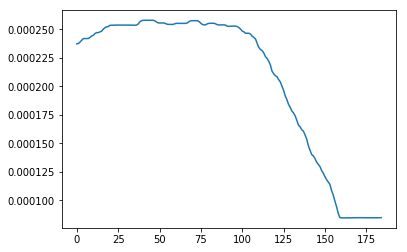

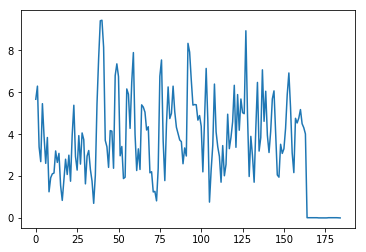

In [29]:
plt.plot(data_mean_single[:,7]*data_mean_single[:,8])
plt.show()
plt.plot(data_mean_single[:,4])
plt.show()

In [33]:
freedrift.rossby_pp(3e-3)
## Ro = (ρIhIfc)/(ρOCONa|UA|)
def radius(rop,n2a,hifc,UA):
    return rop * hifc /np.sqrt(n2a)/UA

In [48]:
radius(400,1.5e-3,2e-4,4)

0.51639777949432231

In [26]:
# constants and ranges
nansen_use = 0.022**2
# nansen_use = 3.3e-4
rossby_use = 500
# rossby_use = 162
n2a_min = nansen_use*1e-3
n2a_max = nansen_use*8e0
# n2a_min = nansen_use*9e-1
# n2a_max = nansen_use*11e-1
rop_min = rossby_use*1e-3
rop_max = rossby_use*3e0
# rop_min = rossby_use*9e-1
# rop_max = rossby_use*11e-1
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)
# general inv parameters
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 

Ca_min = 1.0e-6
Ca_max = 2.0e-3
Co_min = 1.0e-3
Co_max = 6.0e-2

# invert for thO and thA-thO
# these replace for thO
thO_min = np.deg2rad(-179)
thO_max = np.deg2rad( 180)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 179)

# constant thetaA if needed
thAC = np.rad2deg(0)


4.839999999999999e-07 0.022 0.00048399999999999995 0.0038719999999999996
0.5 500 1500.0


In [202]:
data_mean_geo[80:120,3]/data_mean_5[80:120,4]**2

array([  6.12399918,   7.70466273,   8.18136541,   7.08129131,
        10.38288309,  12.85874821,  18.65689478,  62.59508002,
         9.76348378,  18.12821532,   9.69897265,  13.01955261,
         3.6933636 ,   4.18003652,  10.52719479,   6.04908553,
         5.09354994,   7.80150496,   5.21014655,   7.60776341,
         9.54150732,  16.21687873,  10.44508889,   3.8892488 ,
         8.84550594,  33.0197795 ,  18.88604916,   5.67164986,
         3.88065972,   6.01600665,  17.4195071 ,  21.02299297,
        23.06805026,  10.55618869,  46.66218558,  28.5533822 ,
         4.75283112,   2.06244907,  10.74420138,   7.24901504])

In [28]:
day_start=110
i=6
[rhoo/rhoi/data_mean_single[day_start+i,7]/data_mean_single[day_start+i,8]*0.0055,
data_mean_geo[day_start+i,3]/data_mean_5[day_start+i,4]**2,
np.hypot(data_mean_geo[day_start+i,1],data_mean_geo[day_start+i,2])/(data_mean_5[day_start+i,2]**2+data_mean_5[day_start+i,3]**2)]

[27.706355105810069, 4.7528311180735976, 4.5885240025473513]

In [29]:
days_use,first_day,(datetime.datetime(2014,8,1)-datetime.datetime(2014,6,1)).days

NameError: name 'first_day' is not defined

In [30]:
# what to record when processing
# all the days used plus number used
# set a hopeful nbals - this is the window of possible days to use
# then find the number of useful ones within the window and invert
nbals = 10
bal_strd = 1

av_filter = 3
sig_filter= 1.0
first_day = int(((datetime.datetime(2014,6,1)-d150_tstart[d150_start]).days)/day_strd)

# list_d = days_use - frst_day - nbals + 1
# list_d = 1
# what results are needed? 
# best, misfit_min, misfit range
# now using pertiles for everything, wide for NA, quartiles for bayes
# medain model for all within log/4 of range
# bayes_mean for each parameter
# +/- bayes std for each parameter
# diagnostic? did it work for example
list_d = days_use - first_day - nbals
inv_list_d = np.zeros([list_d,nbals+1],dtype=int)
inv_data_d = np.empty([list_d,40],dtype=float)
# list_d = 0
bal_c = 0
i = 0
for day_start in range(first_day,days_use-nbals*bal_strd):
    # find the data_points to use
    bal_c = 0
    bal_p = np.zeros([nbals],int)
#     i = 0
    for i in range(0,nbals*bal_strd,bal_strd):
        if ( data_mean_single[day_start+i,9]>av_filter# number of atmo recs
        and data_mean_5[day_start+i,4]*sig_filter>data_std_5[day_start+i,3]# current less than variance...
        and data_mean_geo[day_start+i,3]*sig_filter>data_std_geo[day_start+i,3]# current less than variance...
        and data_mean_single[day_start+i,4]*sig_filter >data_std_single[day_start+i,7]# wind less than variance...
        and NSIDC_mean[day_start+i,0] > 0.1 # actual ice
        # thorndike & colony filters small G : <<
#         and (rhoo/rhoi/data_mean_single[day_start+i,7]/data_mean_single[day_start+i,8]*0.002>
#              2*data_mean_geo[day_start+i,3]/data_mean_5[day_start+i,4]**2)
#         1*np.hypot(data_mean_geo[day_start+i,1],data_mean_geo[day_start+i,2])/(data_mean_5[day_start+i,2]**2+data_mean_5[day_start+i,3]**2))
#         and data_mean_single[day_start+i,4]>4e0 # Wind scaling
        and data_mean_single[day_start+i,4]>1.0e-1):# Actual winds....
            bal_p[bal_c] = i + day_start
            bal_c += 1
    inv_list_d[day_start - first_day,0] = bal_c
    inv_list_d[day_start - first_day,1:bal_c+1] = bal_p[0:bal_c]
    
# fin dout how many to process - missing days at the end
invs_to_do = np.sum(inv_list_d[:,0]>0)
invs_to_do = list_d


In [125]:
dd=2
days_use,np.shape(data_ranges)
d150_tstart[data_ranges[dd,0]]

datetime.datetime(2014, 3, 19, 3, 2, 0, 999997)

In [126]:
# what to record when processing
# as the script above, but returns nan for the data used so to plot the input data
# also making a date_plot vector
data_use_mask = np.ones(days_use)
# data_use_vec = np.ones(days_use)
# data_use_mask = []
data_use_vec = []
date_plot = []
for i in range(days_use):
    if ( data_mean_single[i,9]>av_filter# number of atmo recs
    and data_mean_5[i,4]*sig_filter>data_std_5[i,3]# current less than variance...
    and data_mean_geo[i,3]*sig_filter>data_std_geo[i,3]# current less than variance...
    and data_mean_single[i,4]*sig_filter >data_std_single[i,7]# wind less than variance...
    and NSIDC_mean[i,0] > 0.1 # actual ice
    # thorndike & colony filters small G : <<
#         and (rhoo/rhoi/data_mean_single[i,7]/data_mean_single[i,8]*0.002>
#              2*data_mean_geo[i,3]/data_mean_5[i,4]**2)
#         1*np.hypot(data_mean_geo[i,1],data_mean_geo[i,2])/(data_mean_5[i,2]**2+data_mean_5[i,3]**2))
#         and data_mean_single[i,4]>4e0 # Wind scaling
    and data_mean_single[i,4]>1.0e-1):# Actual winds....
#         data_use_mask[i] = np.nan
#         data_use_vec[i] = np.nan
#         data_use_mask.append(1.0)
        data_use_vec.append(i+1)
        date_plot.append(d150_tstart[data_ranges[i,0]])
    else:
        data_use_mask[i] = np.nan
#         data_use_vec[i] = i+1
# data_use_mask


In [134]:
np.shape(data_mean_5)

(185, 7)

In [116]:
dd=20
freedrift.ang_between(data_mean_single[dd,2],data_mean_single[dd,3],
                              ERA_U[dd,0],ERA_U[dd,1])


1.0637917833529591

/Users/H/INVERSE/Python/freedrift.py:785: RuntimeWarning: invalid value encountered in double_scalars
  angcos = (x1*x2 + y1*y2)/(mag1*mag2)


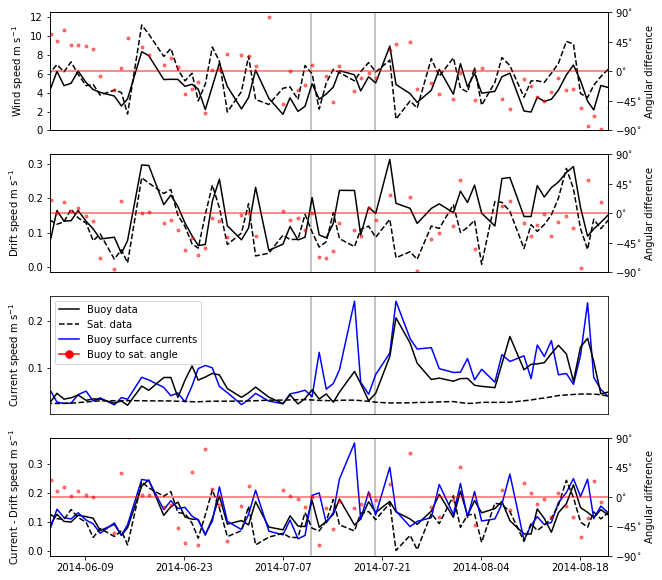

In [194]:
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# plot data - wind, ice, ocn, ocn-ice
# line plot of mag = angular difference
alpha_a = 0.5
f = plt.figure(figsize=[10,10])
ax1 = plt.subplot(4,1,1)
plt.plot_date(date_plot,data_mean_single[np.isfinite(data_use_mask),4],'-k')
plt.plot_date(date_plot,np.hypot(ERA_U[np.isfinite(data_use_mask),0],ERA_U[np.isfinite(data_use_mask),1])
         ,'--k')
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel(r'Wind speed m s$^{-1}$')
plt.yticks([0,2,4,6,8,10,12])
ax2 = ax1.twinx()

temp = np.empty(days_use)
for dd in range(days_use):
    temp[dd] = freedrift.ang_between(data_mean_single[dd,2],data_mean_single[dd,3],
                              ERA_U[dd,0],ERA_U[dd,1])
plt.plot_date(date_plot,np.rad2deg(temp[np.isfinite(data_use_mask)]),'.r',alpha = alpha_a)
plt.ylim([-90,90])
plt.yticks([-90,-45,0,45,90],
           [r'$-90^{\circ}$',r'$-45^{\circ}$',r'$0^{\circ}$',r'$45^{\circ}$',r'$90^{\circ}$'])
plt.ylabel(r'Angular difference')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.axhline(0.0,color='r',alpha = 0.6)
plt.xticks([])


ax1 = plt.subplot(4,1,2)
plt.plot_date(date_plot,data_mean_5[np.isfinite(data_use_mask),5],'-k')
plt.plot_date(date_plot,np.hypot(DRIFT[np.isfinite(data_use_mask),0],DRIFT[np.isfinite(data_use_mask),1])
         ,'--k')
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel(r'Drift speed m s$^{-1}$')
ax2 = ax1.twinx()
plt.xticks([])

temp = np.empty(days_use)
for dd in range(days_use):
    temp[dd] = freedrift.ang_between(data_mean_5[dd,7],data_mean_5[dd,8],
                              DRIFT[dd,0],DRIFT[dd,1])
plt.plot_date(date_plot,np.rad2deg(temp[np.isfinite(data_use_mask)]),'.r',alpha = alpha_a)

# temp = np.empty(days_use)
# for dd in range(days_use):
#     temp[dd] = freedrift.ang_between(data_mean_single[dd,2],data_mean_single[dd,3],
#                               data_mean_5[dd,7],data_mean_5[dd,8])
# plt.plot_date(date_plot,np.rad2deg(temp[np.isfinite(data_use_mask)]),'-b',alpha = alpha_a)
plt.ylim([-90,90])
plt.yticks([-90,-45,0,45,90],
           [r'$-90^{\circ}$',r'$-45^{\circ}$',r'$0^{\circ}$',r'$45^{\circ}$',r'$90^{\circ}$'])
plt.ylabel(r'Angular difference')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.axhline(0.0,color='r',alpha = 0.6)
plt.xticks([])

ax1 = plt.subplot(4,1,3)
plt.plot_date(date_plot,data_mean_5[np.isfinite(data_use_mask),6],'-b')
plt.plot_date(date_plot,data_mean_geo[np.isfinite(data_use_mask),5],'-k')
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
# plt.plot_date(date_plot,np.hypot(
#         data_mean_geo[np.isfinite(data_use_mask),1] + data_mean_5[np.isfinite(data_use_mask),7],
#         data_mean_geo[np.isfinite(data_use_mask),2] + data_mean_5[np.isfinite(data_use_mask),8]),'-k')
# plt.plot_date(date_plot,np.hypot(
#         data_mean_5[np.isfinite(data_use_mask),2] + data_mean_5[np.isfinite(data_use_mask),7],
#         data_mean_5[np.isfinite(data_use_mask),3] + data_mean_5[np.isfinite(data_use_mask),8]),'-b')
plt.plot_date(date_plot,np.hypot(GEO_W[np.isfinite(data_use_mask),0],GEO_W[np.isfinite(data_use_mask),1])
         ,'--k')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.yticks([0,0.1,0.2])
plt.ylabel(r'Current speed m s$^{-1}$')
# ax2 = ax1.twinx()
patch1 = mlines.Line2D([], [], color='k', label='Buoy data')
patch2 = mlines.Line2D([], [], linestyle = 'dashed',color='k', label='Sat. data')
patch3 = mlines.Line2D([], [], color='b', label='Buoy surface currents')
patch4 = mlines.Line2D([], [], color='r', marker='.',markersize=15, label='Buoy to sat. angle')
ax1.legend(handles=[patch1,patch2,patch3,patch4])
plt.xticks([])

# temp = np.empty(days_use)
# for dd in range(days_use):
#     temp[dd] = freedrift.ang_between(data_mean_geo[dd,1] + data_mean_5[dd,7],
#                                      data_mean_geo[dd,2] + data_mean_5[dd,8],
#                               GEO_W[dd,0],GEO_W[dd,1])
# plt.plot_date(date_plot,np.rad2deg(temp[np.isfinite(data_use_mask)]),'.r',alpha = alpha_a)
# plt.ylim([-90,90])
# plt.yticks([-90,-45,0,45,90],
#            [r'$-90^{\circ}$',r'$-45^{\circ}$',r'$0^{\circ}$',r'$45^{\circ}$',r'$90^{\circ}$'])
# plt.ylabel(r'Angular difference')
# plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
# plt.axhline(0.0,color='r',alpha = 0.6)
# plt.xticks([])

ax1 = plt.subplot(4,1,4)
plt.plot_date(date_plot,data_mean_geo[np.isfinite(data_use_mask),3],'-k')
plt.plot_date(date_plot,data_mean_5[np.isfinite(data_use_mask),4],'-b')
plt.plot_date(date_plot,np.hypot(
    GEO_W[np.isfinite(data_use_mask),0]-DRIFT[np.isfinite(data_use_mask),0],
    GEO_W[np.isfinite(data_use_mask),1]-DRIFT[np.isfinite(data_use_mask),1])
         ,'--k')
plt.axvline(datetime.datetime(2014,7,11),color='k',alpha = 0.3)
plt.axvline(datetime.datetime(2014,7,20),color='k',alpha = 0.3)
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.ylabel(r'Current - Drift speed m s$^{-1}$')
ax2 = ax1.twinx()

temp = np.empty(days_use)
for dd in range(days_use):
    temp[dd] = freedrift.ang_between(data_mean_geo[dd,1],data_mean_geo[dd,2],
                              GEO_W[dd,0]-DRIFT[dd,0],GEO_W[dd,1]-DRIFT[dd,1])
plt.plot_date(date_plot,np.rad2deg(temp[np.isfinite(data_use_mask)]),'.r',alpha = alpha_a)
plt.ylim([-90,90])
plt.yticks([-90,-45,0,45,90],
           [r'$-90^{\circ}$',r'$-45^{\circ}$',r'$0^{\circ}$',r'$45^{\circ}$',r'$90^{\circ}$'])
plt.ylabel(r'Angular difference')
plt.xlim([datetime.datetime(2014,6,4),datetime.datetime(2014,8,22)])
plt.axhline(0.0,color='r',alpha = 0.6)

plt.show()
f.savefig(fig_location+'buoy_02_input_data.pdf',format='pdf',bbox_inches='tight')

In [201]:
nb = 0
jj = inv_list_d[dd,nb+1]
(d150_tstart[d150_start]+datetime.timedelta(days=int(1+jj*day_strd))),jj

(datetime.datetime(2014, 7, 11, 0, 2, 2, 2), 115)

In [248]:
#  convert inv list to be careful with the strides BE CAREFUL DON"T DO IT TWICE

save_file = '/Inverted_groups_02/inverted_group_18-10-10_vel_mags_1_day.npz'
np.savez(location+save_file, # want wind ice ocean geo mag - running mean and immediate
    wind_mag=data_mean_single[:,4],
    ice_mag=data_mean_5[:,5],
    geo_mag=data_mean_geo[:,3],
    geo_ocn_mag=data_mean_geo[:,5],
    ERA_mag=ERA_U_mean[:,2],
    DRIFT_mag=DRIFT_mean[:,2]
        )


In [32]:
invs_to_do,inv_list_d[35:45,:]

(100, array([[  9, 110, 112, 113, 114, 115, 116, 117, 118, 119,   0],
        [  9, 112, 113, 114, 115, 116, 117, 118, 119, 120,   0],
        [  9, 112, 113, 114, 115, 116, 117, 118, 119, 120,   0],
        [  9, 113, 114, 115, 116, 117, 118, 119, 120, 122,   0],
        [  9, 114, 115, 116, 117, 118, 119, 120, 122, 123,   0],
        [  9, 115, 116, 117, 118, 119, 120, 122, 123, 124,   0],
        [  9, 116, 117, 118, 119, 120, 122, 123, 124, 125,   0],
        [  8, 117, 118, 119, 120, 122, 123, 124, 125,   0,   0],
        [  8, 118, 119, 120, 122, 123, 124, 125, 127,   0,   0],
        [  8, 119, 120, 122, 123, 124, 125, 127, 128,   0,   0]]))

In [33]:
day_start,first_day, days_use,inv_list_d

(174, 75, 185, array([[ 9, 75, 76, ..., 83, 84,  0],
        [ 9, 76, 77, ..., 84, 85,  0],
        [ 9, 77, 79, ..., 85, 86,  0],
        ..., 
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]))

In [204]:
# NOW ADDED EXTRA TO ANIMATE IT


# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo/'
na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo_O-A/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo_thAC/'
# these replace for thO
# thO_min = np.deg2rad(-5)
# thO_max = np.deg2rad( 5)
thO_min = np.deg2rad( 0)
thO_max = np.deg2rad( 359)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 180)
# thAO_min = np.deg2rad(18)
# thAO_max = np.deg2rad(28)
# for dd in range(0,list_d-nbals):
# for dd in range(0,invs_to_do):
# for dd in range(6,7):
# for dd in range(23,24):
for dd in range(40,41):
#     day_start = bal_all[dd]
    day_start = inv_list_d[dd,1]
#     print('Inverting day ',day_start,', no ',dd,' of ',list_d)
    nbals_use = inv_list_d[dd,0]
    print('Inverting day ',day_start,', no ',dd + 1,' of ',invs_to_do,' nbals = ',nbals_use)

# will now filter the data before processing ot get the exact number of records to do
    # load up the data
    data_in = np.ndarray([nbals_use*17+12],dtype='float32')
    
    Na2_scale = 0.015**2
    beta_a = np.ndarray([nbals_use])
    beta_i = np.ndarray([nbals_use])
    beta_g = np.ndarray([nbals_use])
    beta_fb= np.ndarray([nbals_use])
    # for j in range(nbals_use):
    #     i = bal_p[j]
    #     beta_a[j] = 0.0/Bbeta_a # 1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
    #     beta_i[j] = 0.0/Bbeta_i # 1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
    #     beta_fb[j]= 1.0/Bbeta_fb# 1.0 #  data_mean_single[day_start+day+i,4]**-4
    for j in range(nbals_use):
        i = bal_p[j]
        beta_a[j] =  1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
        beta_i[j] =  1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
        beta_g[j] =  0.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
        beta_fb[j]=  1.0 #  data
    r = 0;
    data_in[0] = nbals_use;
#     inv_list_d[dd,0]=nbals_use
    for j in range(nbals_use):
#         i = bal_p[j]
#         i = bal_all[dd+j]-day_start
#         inv_list_d[dd,1+j] = day_start + i
        i = inv_list_d[dd,j+1] - day_start
        # wind data
        data_in[1+0*nbals_use+j] = data_mean_single[day_start+i,2] # uwind
        data_in[1+1*nbals_use+j] = data_mean_single[day_start+i,3] # vwind
        data_in[1+2*nbals_use+j] = data_mean_single[day_start+i,4] # mag
        data_in[1+3*nbals_use+j] = data_std_single[ day_start+i,7] # sig
        # i_o data
        data_in[1+4*nbals_use+j] = data_mean_5[day_start+i,2] # uice
        data_in[1+5*nbals_use+j] = data_mean_5[day_start+i,3] # vice
        data_in[1+6*nbals_use+j] = data_mean_5[day_start+i,4] # mag
        data_in[1+7*nbals_use+j] = data_std_5[ day_start+i,3] # sig
        # i_o data geo
#         data_in[1+8*nbals_use+j] = data_mean_geo[day_start+i,10] # ugeo smooth
#         data_in[1+9*nbals_use+j] = data_mean_geo[day_start+i,11] # vgeo smooth
#         data_in[1+8*nbals_use+j] = -geo_temp[day_start+i,0] # -uice
#         data_in[1+9*nbals_use+j] = -geo_temp[day_start+i,1] # -uice
#         data_in[1+8*nbals_use+j] = GEO_W[day_start+i,0]-geo_temp[day_start+i,0] # CRYoSAT-uice
#         data_in[1+9*nbals_use+j] = GEO_W[day_start+i,1]-geo_temp[day_start+i,1] # CRYoSAT-uice
        data_in[1+8*nbals_use+j] = data_mean_geo[day_start+i,1] # ugeo
        data_in[1+9*nbals_use+j] = data_mean_geo[day_start+i,2] # vgeo
        data_in[1+10*nbals_use+j] = data_mean_geo[day_start+i,3] # mag
        data_in[1+11*nbals_use+j] = data_std_geo[ day_start+i,3] # sig
    #     data_in[1+7*nbals_use+i] = data_mean_big[ day_start+i,5,d_w] # sig
       # scale data
        data_in[1+12*nbals_use+j] = beta_a[j] ;r+=nbals_use # beta scalings - see above
        data_in[1+13*nbals_use+j] = beta_i[j] ;r+=nbals_use
        data_in[1+14*nbals_use+j] = beta_g[j] ;r+=nbals_use
        data_in[1+15*nbals_use+j] = beta_fb[j];r+=nbals_use
        data_in[1+16*nbals_use+j] = (data_mean_single[day_start+i,7]*
                                 data_mean_single[day_start+i,8]) # hifc   
#                                  data_mean_single[day_start+i,8]*NSIDC[day_start+i,0]) # hifc*conc
    r = 1 + 17 * nbals_use
    # other data/constants
    data_in[r] = rhoa ;r+=1
    data_in[r] = rhoi ;r+=1
    data_in[r] = rhoo ;r+=1
#     data_in[r] = thAC ;r+=1
    # special for range
    data_in[r] = n2a_min;r+=1
    data_in[r] = n2a_max;r+=1
    data_in[r] = rop_min;r+=1
    data_in[r] = rop_max;r+=1
    data_in[r] = thO_min;r+=1
    data_in[r] = thO_max;r+=1
    data_in[r] = thAO_min;r+=1
    data_in[r] = thAO_max;r+=1
    f = open(na_location+'/freedrift_IC','wb')
    data_in.tofile(f,sep=' ')
    f.close()
    
    #!!!! RUN THE NA !!!!
#     ! NA_setup/NA_run_i_o_w_a/bin/freedrift_na
#     ! NA_setup/NA_run_i_o_w_a/nad2asc na.nad na.asc
#     ! NA_setup/NA_run_i_o_w_a_thAC/bin/freedrift_na
#     ! NA_setup/NA_run_i_o_w_a_thAC/nad2asc na.nad na.asc
    if (nbals_use>2):
#         ! nohup NA_setup/NA_geo/bin/freedrift_na 
#         ! nohup NA_setup/NA_geo/nad2asc na.nad na.asc
        ! nohup NA_setup/NA_geo_O-A/bin/freedrift_na 
        ! nohup NA_setup/NA_geo_O-A/nad2asc na.nad na.asc
#     ! nohup NA_setup/NA_geo_thAC/bin/freedrift_na
#     ! NA_setup/NA_geo_thAC/nad2asc na.nad na.asc
    # # read output
        data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                     names=['number','Na','Ro','thO','thA-O','misfit'])
#     data_NA = ascii.read(location+'/na.asc',guess=False,header_start=13,data_start=13,
#                      names=['number','Na','Ro','thO','misfit'])
    
        misfit_filter = 1e7
        misfit_min = data_NA['misfit'][0]
        misfit_ratio = 0.25
        misfit_max = 0.0
        misfit_min_no = 0
        for i in data_NA['number'][0:-1]:
            if data_NA['misfit'][i] < misfit_min:
                misfit_min = data_NA['misfit'][i]
                misfit_min_no = i
            if (data_NA['misfit'][i] > misfit_max and data_NA['misfit'][i] < misfit_filter):
                misfit_max = data_NA['misfit'][i]
        misfit_range = misfit_max/misfit_min

        misfit_cut = misfit_min**(1.0 - misfit_ratio)*misfit_max**misfit_ratio
        # number_cut = int(3*data_NA['number'][-1]/4)
        number_cut = it1
        data_NA_cut = np.empty([6,data_NA['number'][-1]])
        #
        i_cut = -1
        for i in data_NA['number'][number_cut:-1]:
            if data_NA['misfit'][i] < misfit_cut:
                i_cut += 1
                data_NA_cut[0,i_cut] = data_NA['number'][i]
                data_NA_cut[1,i_cut] = data_NA['Na'][i]
                data_NA_cut[2,i_cut] = data_NA['Ro'][i]
                data_NA_cut[3,i_cut] = data_NA['thO'][i]
                data_NA_cut[4,i_cut] = data_NA['thA-O'][i]
    #             data_NA_cut[4,i_cut] = 0.0
                data_NA_cut[5,i_cut] = data_NA['misfit'][i]

        # save the NA results
        inv_data_d[dd,0] = data_NA['misfit'][misfit_min_no]
        inv_data_d[dd,1] = misfit_range
        inv_data_d[dd,2] = misfit_cut
        inv_data_d[dd,3] = data_NA['Na'][misfit_min_no]
        inv_data_d[dd,4] = data_NA['Ro'][misfit_min_no]
        inv_data_d[dd,5] = data_NA['thO'][misfit_min_no]
        inv_data_d[dd,6] = data_NA['thA-O'][misfit_min_no]
    #     inv_data_d[day_start-first_day,6] = 0.0
        inv_data_d[dd,7:10]  = np.percentile(data_NA_cut[1,0:i_cut],[5,50,95])
        inv_data_d[dd,10:13] = np.percentile(data_NA_cut[2,0:i_cut],[5,50,95])
        inv_data_d[dd,13:16] = np.percentile(data_NA_cut[3,0:i_cut],[5,50,95])
        inv_data_d[dd,16:19] = np.percentile(data_NA_cut[4,0:i_cut],[5,50,95])
    #     inv_data_d[day_start-first_day,16:19] = [0.0,0.0,0.0]

        # copy the ouput for NA_bayes
        ! cp na.nad ensemble.nad
        # run the NA_bayes
    #     # THIS IS THE SLOW BIT
#         ! NA_setup/NA_Bayes/bin/freedrift_nab
        # read the ouput
        file = location+'/nab.samples'
        data_bayes=np.genfromtxt(file,skip_header=3)
        # means and deviations
        inv_data_d[dd,20]= np.mean(data_bayes[:,0])
        inv_data_d[dd,21]= np.mean(data_bayes[:,1])
        inv_data_d[dd,22]= np.mean(data_bayes[:,2])
        inv_data_d[dd,23]= np.mean(data_bayes[:,3])
    #     inv_data_d[day_start-first_day,23] = 0.0
        inv_data_d[dd,24]= np.std(data_bayes[:,0])
        inv_data_d[dd,25]= np.std(data_bayes[:,1])
        inv_data_d[dd,26]= np.std(data_bayes[:,2])
        inv_data_d[dd,27]= np.std(data_bayes[:,3])
    #     inv_data_d[day_start-first_day,27] = 0.0
        inv_data_d[dd,28:31] = np.percentile(data_bayes[:,0],[25,50,75])
        inv_data_d[dd,31:34] = np.percentile(data_bayes[:,1],[25,50,75])
        inv_data_d[dd,34:37] = np.percentile(data_bayes[:,2],[25,50,75])
        inv_data_d[dd,37:40] = np.percentile(data_bayes[:,3],[25,50,75])
#     inv_data_d[day_start-first_day,37:40] = [0.0,0.0,0.0]
    else:
        inv_data_d[dd,:] = np.nan

Inverting day  115 , no  41  of  100  nbals =  9
appending output to nohup.out
appending output to nohup.out


In [35]:
#  convert inv list to be careful with the strides BE CAREFUL DON"T DO IT TWICE
inv_list_d_save =  np.zeros(np.shape(inv_list_d),dtype=int)
inv_list_d_save[:,0] = inv_list_d[:,0]
for i in range(invs_to_do): inv_list_d_save[i,1:inv_list_d[i,0]+1] = inv_list_d[i,1:inv_list_d[i,0]+1]*day_strd

# save_file = '/Inverted_groups_02/inverted_group_18_08_06_bayes_d5_geo_O-A_geo10d.npz'
# np.savez(location+save_file,inv_list_d=inv_list_d_save,inv_data_d=inv_data_d )


In [218]:
# invert for thO and thA-thO
# these replace for thO
# thO_min = np.deg2rad(-10)
# thO_max = np.deg2rad( 10)
# thO_min = np.deg2rad(0)
# thO_max = np.deg2rad( 359)
thO_min = np.deg2rad(-179)
thO_max = np.deg2rad( 180)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 180)

# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_run_i_o_w_a/'
na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_i_o_O-A/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_run_i_o_w_a_thAC/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo_thAC/'
# for dd in range(0,list_d-nbals):
# for dd in range(0,invs_to_do):
for dd in range(6,7):
# for dd in range(23,24):
# for dd in range(46,47):
# for dd in range(5,6):
# for dd in range(77,78):
#     day_start = bal_all[dd]
    day_start = inv_list_d[dd,1]
    nbals_use = inv_list_d[dd,0]
#     print('Inverting day ',day_start,', no ',dd,' of ',list_d)
    print('Inverting day ',day_start,', no ',dd + 1,' of ',invs_to_do,' nbals = ',nbals_use)

# will now filter the data before processing ot get the exact number of records to do
    # load up the data
    data_in = np.ndarray([nbals_use*12+13],dtype='float32')
    
    Na2_scale = 0.015**2
    beta_a = np.ndarray([nbals_use])
    beta_i = np.ndarray([nbals_use])
    beta_w = np.ndarray([nbals_use])
    beta_fb= np.ndarray([nbals_use])
    # for j in range(nbals_use):
    #     i = bal_p[j]
    #     beta_a[j] = 0.0/Bbeta_a # 1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
    #     beta_i[j] = 0.0/Bbeta_i # 1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
    #     beta_fb[j]= 1.0/Bbeta_fb# 1.0 #  data_mean_single[day_start+day+i,4]**-4
    for j in range(nbals_use):
        i = bal_p[j]
        beta_a[j] =  1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
        beta_i[j] =  1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
        beta_fb[j]=  1.0 #  data
    r = 0;
    data_in[0] = nbals_use;
#     inv_list_d[dd,0]=nbals_use
    for j in range(nbals_use):
#         i = bal_p[j]
#         i = bal_all[dd+j]-day_start
#         inv_list_d[dd,1+j] = day_start + i
        i = inv_list_d[dd,j+1] - day_start
        # wind data
#         data_in[1+0*nbals_use+j] = data_mean_single[day_start+i,2] # uwind
#         data_in[1+1*nbals_use+j] = data_mean_single[day_start+i,3] # vwind
#         data_in[1+2*nbals_use+j] = data_mean_single[day_start+i,4] # mag
#         data_in[1+3*nbals_use+j] = data_std_single[ day_start+i,7] # sig
        
#         data_in[1+0*nbals_use+j] = ERA_U[day_start+i,0] # uwind
#         data_in[1+1*nbals_use+j] = ERA_U[day_start+i,1] # vwind
#         data_in[1+2*nbals_use+j] = ERA_U[day_start+i,2] # mag
#         data_in[1+3*nbals_use+j] = ERA_U[day_start+i,4] # sig
        data_in[1+0*nbals_use+j] = ERA_U_mean[day_start+i,0] # uwind
        data_in[1+1*nbals_use+j] = ERA_U_mean[day_start+i,1] # vwind
        data_in[1+2*nbals_use+j] = ERA_U_mean[day_start+i,2] # mag
        data_in[1+3*nbals_use+j] = ERA_U_mean[day_start+i,3] # sig
        # #i_o data
#         data_in[1+4*nbals_use+j] = data_mean_5[day_start+i,2] # uice
#         data_in[1+5*nbals_use+j] = data_mean_5[day_start+i,3] # vice
#         data_in[1+6*nbals_use+j] = data_mean_5[day_start+i,4] # mag
#         data_in[1+7*nbals_use+j] = data_std_5[ day_start+i,3] # sig
        # i_o data geo
#         data_in[1+8*nbals_use+j] = data_mean_geo[day_start+i,10] # uice
#         data_in[1+9*nbals_use+j] = data_mean_geo[day_start+i,11] # vice
#         data_in[1+4*nbals_use+j] = data_mean_geo[day_start+i,1] # uice
#         data_in[1+5*nbals_use+j] = data_mean_geo[day_start+i,2] # vice
#         data_in[1+6*nbals_use+j] = data_mean_geo[day_start+i,3] # mag
#         data_in[1+7*nbals_use+j] = data_std_geo[ day_start+i,3] # sig
        
#         data_in[1+4*nbals_use+j] = GEO_W[day_start+i,0] - DRIFT[day_start+i,0] # uwind
#         data_in[1+5*nbals_use+j] = GEO_W[day_start+i,1] - DRIFT[day_start+i,1] # vwind
#         data_in[1+6*nbals_use+j] = np.hypot(data_in[1+0*nbals_use+j] , data_in[1+1*nbals_use+j]) # mag
#         data_in[1+7*nbals_use+j] = np.hypot(GEO_W[day_start+i,4] , DRIFT[day_start+i,4]) # sig
    #     data_in[1+7*nbals_use+i] = data_mean_big[ day_start+i,5,d_w] # sig
        data_in[1+4*nbals_use+j] = SATOI_mean[day_start+i,0] 
        data_in[1+5*nbals_use+j] = SATOI_mean[day_start+i,1]
        data_in[1+6*nbals_use+j] = SATOI_mean[day_start+i,2]
        data_in[1+7*nbals_use+j] = SATOI_mean[day_start+i,3]
#        # scale data
        data_in[1+8*nbals_use+j] = beta_a[j] ;r+=nbals_use # beta scalings - see above
        data_in[1+9*nbals_use+j] = beta_i[j] ;r+=nbals_use
        data_in[1+10*nbals_use+j] = beta_fb[j];r+=nbals_use
        data_in[1+11*nbals_use+j] = (data_mean_single[day_start+i,7]*
                                 data_mean_single[day_start+i,8]) # hifc   
#                                  data_mean_single[day_start+i,8]*NSIDC[day_start+i,0]) # hifc*conc
    r = 1 + 12 * nbals_use
    # other data/constants
    data_in[r] = rhoa ;r+=1
    data_in[r] = rhoi ;r+=1
    data_in[r] = rhoo ;r+=1
#     data_in[r] = thAC ;r+=1
    # special for range
    data_in[r] = n2a_min;r+=1
    data_in[r] = n2a_max;r+=1
    data_in[r] = rop_min;r+=1
    data_in[r] = rop_max;r+=1
    data_in[r] = thO_min;r+=1
    data_in[r] = thO_max;r+=1
    data_in[r] = thAO_min;r+=1
    data_in[r] = thAO_max;r+=1
    f = open(na_location+'/freedrift_IC','wb')
    data_in.tofile(f,sep=' ')
    f.close()
    
    if (nbals_use>2):
    #!!!! RUN THE NA !!!!
#         ! nohup NA_setup/NA_run_i_o_w_a/bin/freedrift_na
#         ! nohup NA_setup/NA_run_i_o_w_a/nad2asc na.nad na.asc
        ! nohup NA_setup/NA_i_o_O-A/bin/freedrift_na
        ! nohup NA_setup/NA_i_o_O-A/nad2asc na.nad na.asc
    #     ! NA_setup/NA_run_i_o_w_a_thAC/bin/freedrift_na
    #     ! NA_setup/NA_run_i_o_w_a_thAC/nad2asc na.nad na.asc
    #     ! NA_setup/NA_geo/bin/freedrift_na
    #     ! NA_setup/NA_geo/nad2asc na.nad na.asc
        # # read output
        data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                         names=['number','Na','Ro','thO','thA-O','misfit'])
    #     data_NA = ascii.read(location+'/na.asc',guess=False,header_start=13,data_start=13,
    #                      names=['number','Na','Ro','thO','misfit'])
        
        misfit_filter = 1e7
        misfit_min = data_NA['misfit'][0]
        misfit_ratio = 0.25
        misfit_max = 0.0
        misfit_min_no = 0
        for i in data_NA['number'][0:-1]:
            if data_NA['misfit'][i] < misfit_min:
                misfit_min = data_NA['misfit'][i]
                misfit_min_no = i
            if (data_NA['misfit'][i] > misfit_max and data_NA['misfit'][i] < misfit_filter):
                misfit_max = data_NA['misfit'][i]
        misfit_range = misfit_max/misfit_min
        
        misfit_cut = misfit_min**(1.0 - misfit_ratio)*misfit_max**misfit_ratio
        # number_cut = int(3*data_NA['number'][-1]/4)
        number_cut = it1
        data_NA_cut = np.empty([6,data_NA['number'][-1]])
        #
        i_cut = -1
        for i in data_NA['number'][number_cut:-1]:
            if data_NA['misfit'][i] < misfit_cut:
                i_cut += 1
                data_NA_cut[0,i_cut] = data_NA['number'][i]
                data_NA_cut[1,i_cut] = data_NA['Na'][i]
                data_NA_cut[2,i_cut] = data_NA['Ro'][i]
                data_NA_cut[3,i_cut] = data_NA['thO'][i]
                data_NA_cut[4,i_cut] = data_NA['thA-O'][i]
    #             data_NA_cut[4,i_cut] = 0.0
                data_NA_cut[5,i_cut] = data_NA['misfit'][i]
        
        # save the NA results
        inv_data_d[dd,0] = data_NA['misfit'][misfit_min_no]
        inv_data_d[dd,1] = misfit_range
        inv_data_d[dd,2] = misfit_cut
        inv_data_d[dd,3] = data_NA['Na'][misfit_min_no]
        inv_data_d[dd,4] = data_NA['Ro'][misfit_min_no]
        inv_data_d[dd,5] = data_NA['thO'][misfit_min_no]
        inv_data_d[dd,6] = data_NA['thA-O'][misfit_min_no]
    #     inv_data_d[dd,6] = 0.0
        inv_data_d[dd,7:10]  = np.percentile(data_NA_cut[1,0:i_cut],[5,50,95])
        inv_data_d[dd,10:13] = np.percentile(data_NA_cut[2,0:i_cut],[5,50,95])
        inv_data_d[dd,13:16] = np.percentile(data_NA_cut[3,0:i_cut],[5,50,95])
        inv_data_d[dd,16:19] = np.percentile(data_NA_cut[4,0:i_cut],[5,50,95])
    #     inv_data_d[dd,16:19] = [0.0,0.0,0.0]
        
        # copy the ouput for NA_bayes
        ! cp na.nad ensemble.nad
    #     # run the NA_bayes
    #     # THIS IS THE SLOW BIT
        ! NA_setup/NA_Bayes/bin/freedrift_nab
        # read the ouput
        file = location+'/nab.samples'
        data_bayes=np.genfromtxt(file,skip_header=3)
        # means and deviations
        inv_data_d[dd,20]= np.mean(data_bayes[:,0])
        inv_data_d[dd,21]= np.mean(data_bayes[:,1])
        inv_data_d[dd,22]= np.mean(data_bayes[:,2])
        inv_data_d[dd,23]= np.mean(data_bayes[:,3])
    #     inv_data_d[dd,23] = 0.0
        inv_data_d[dd,24]= np.std(data_bayes[:,0])
        inv_data_d[dd,25]= np.std(data_bayes[:,1])
        inv_data_d[dd,26]= np.std(data_bayes[:,2])
        inv_data_d[dd,27]= np.std(data_bayes[:,3])
    #     inv_data_d[dd,27] = 0.0
        inv_data_d[dd,28:31] = np.percentile(data_bayes[:,0],[25,50,75])
        inv_data_d[dd,31:34] = np.percentile(data_bayes[:,1],[25,50,75])
        inv_data_d[dd,34:37] = np.percentile(data_bayes[:,2],[25,50,75])
        inv_data_d[dd,37:40] = np.percentile(data_bayes[:,3],[25,50,75])
#     inv_data_d[dd,37:40] = [0.0,0.0,0.0]
    else:
        inv_data_d[dd,:] = np.nan

Inverting day  18 , no  7  of  12  nbals =  4
appending output to nohup.out
appending output to nohup.out


------------------------------------------------------------------------


  Program nab - Monte Carlo integration of Bayesian integrals
                using Neighbourhood approximation sampling


------------------------------------------------------------------------


  Summary of input options

  Number of models in ensemble    :         6200
  Number of dimensions            :            4
  Number of random walks          :           20
  Number of steps per walk        :          200
  Total number of samples         :         4000
  Starting cell for first walk    :            1
  Number of samples per reset     :         2000
  Type of random deviate : Pseudo : seed      230728

  MC integration options:

  Calculate 1D marginal pdfs                  : no
  Covariance matrix                           : no
  Number of 2D marginal pdfs to be calculated :            2
  Nu

In [487]:
inv_list_d_save =  np.zeros(np.shape(inv_list_d),dtype=int)
inv_list_d_save[:,0] = inv_list_d[:,0]
for i in range(invs_to_do): inv_list_d_save[i,1:inv_list_d[i,0]+1] = inv_list_d[i,1:inv_list_d[i,0]+1]*day_strd

save_file = '/Inverted_groups_02/inverted_group_18_08_06_na_only_geo_geo_10d.npz'
np.savez(location+save_file,inv_list_d=inv_list_d_save,inv_data_d=inv_data_d )

In [36]:
# constants and ranges
nansen_use = 0.022**2
rossby_use = 500
n2a_min = nansen_use*1e-2
n2a_max = nansen_use*4e0
rop_min = rossby_use*1e-2
rop_max = rossby_use*3e0
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)
# general inv parameters
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 

Ca_min = 1.0e-6
Ca_max = 2.0e-3
Co_min = 1.0e-3
Co_max = 6.0e-2

# invert for thO and thA-thO
# these replace for thO
thO_min = np.deg2rad(-359)
thO_max = np.deg2rad( 0)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 179)

# constant thetaA if needed
thAC = np.rad2deg(0)


4.839999999999999e-06 0.022 0.00048399999999999995 0.0019359999999999998
5.0 500 1500.0


In [37]:
inv_data_d[1,:]
data_in

array([  9.00000000e+00,  -2.21367383e+00,  -4.58395338e+00,
        -2.20730710e+00,   1.44065821e+00,   3.66359019e+00,
         4.63364649e+00,  -3.11047578e+00,  -5.67976356e-01,
         1.06811202e+00,   6.70719206e-01,   1.80839169e+00,
         2.48195186e-01,   2.72399044e+00,   1.85606563e+00,
        -4.20332956e+00,   4.68492222e+00,   4.06479883e+00,
         5.45440626e+00,   2.55783343e+00,   4.95300007e+00,
         3.30812502e+00,   3.84691668e+00,   4.59254169e+00,
         6.33445835e+00,   5.89154148e+00,   4.18845844e+00,
         5.67933321e+00,   1.41784823e+00,   1.23234928e+00,
         3.15640116e+00,   2.51968002e+00,   2.25498843e+00,
         1.36725080e+00,   3.07690644e+00,   1.17526841e+00,
         1.45425284e+00,   1.76377203e-02,   1.04831696e-01,
         1.55612111e-01,  -3.81240472e-02,  -1.23112462e-01,
        -1.27098709e-01,  -3.39372158e-02,  -6.68599084e-02,
        -1.37704805e-01,  -4.62762080e-02,  -1.59471259e-01,
        -6.80755973e-02,

In [38]:
# ! NA_setup/NA_run_i_o_w_a/bin/freedrift_na
# ! pwd
# # ! bin/freedrift_na
# ! NA_setup/NA_run_i_o_w_a/nad2asc na.nad na.asc
# # ! cd ../..
# # read output
data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                     names=['number','Na','Ro','thO','thA-O','misfit'])

##### filter misfits
misfit_filter = 1e5
misfit_ratio = 0.2
misfit_min = data_NA['misfit'][0]
misfit_max = 0.0
misfit_min_no = 0
for i in data_NA['number'][0:-1]:
    if data_NA['misfit'][i] < misfit_min:
        misfit_min = data_NA['misfit'][i]
        misfit_min_no = i
    if (data_NA['misfit'][i] > misfit_max and data_NA['misfit'][i] < misfit_filter):
        misfit_max = data_NA['misfit'][i]
misfit_range = misfit_max/misfit_min
# misfit_cut = misfit_min * (1.0 + misfit_range *  1e-3) 
misfit_cut = misfit_min**(1.0 - misfit_ratio)*misfit_max**misfit_ratio
# number_cut = int(3*data_NA['number'][-1]/4)
number_cut = 0
data_NA_cut = np.empty([6,data_NA['number'][-1]])
#
i_cut = -1
for i in data_NA['number'][number_cut:-1]:
    if data_NA['misfit'][i] < misfit_cut:
        i_cut += 1
        data_NA_cut[0,i_cut] = data_NA['number'][i]
        data_NA_cut[1,i_cut] = data_NA['Na'][i]
        data_NA_cut[2,i_cut] = data_NA['Ro'][i]
        data_NA_cut[3,i_cut] = data_NA['thO'][i]
        data_NA_cut[4,i_cut] = data_NA['thA-O'][i]
        data_NA_cut[5,i_cut] = data_NA['misfit'][i]
print(i_cut, misfit_min_no,np.mean(data_NA_cut[5,0:i_cut+1]))

5756 5843 2.48493051637


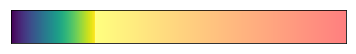

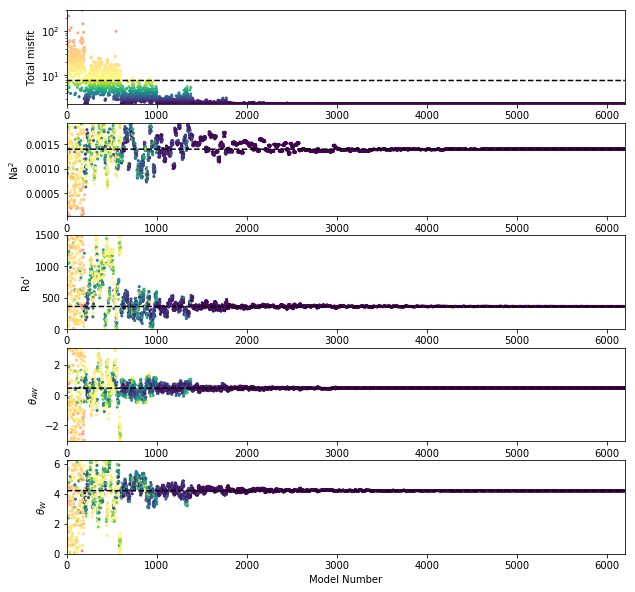

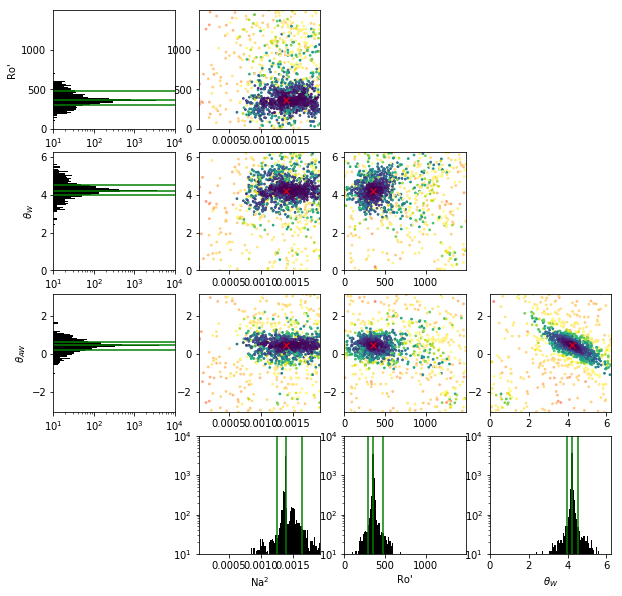

In [205]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-31/'
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
# colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
# colors = np.vstack((colors1, colors2))
colors = np.vstack((colors1,1-(1-colors2)*0.5))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.xticks([])
plt.yticks([])
plt.show()

# plot misfit
# cmin = 1e-10
# cmax = 1e2
plt.figure(figsize=[10,10])
plt.subplot(5,1,1)
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,np.max(data_NA['misfit'])])
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')

plt.subplot(5,1,2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
# plt.savefig('misfit_all_100%.pdf')
plt.subplot(5,1,3)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
plt.subplot(5,1,4)
plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{AW}$')
plt.subplot(5,1,5)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{W}$')
plt.xlabel('Model Number')
plt.show()

# plot trade off
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
f = plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])
# horizontal hists
plt.subplot(4,4,1)
plt.hist(data_NA['Ro'],bins=100,color='k',orientation='horizontal')
plt.axhline(inv_data_d[dd,10],color='g')
plt.axhline(inv_data_d[dd,11],color='g')
plt.axhline(inv_data_d[dd,12],color='g')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(data_NA['thO'],bins=100,color='k',orientation='horizontal')
plt.axhline(inv_data_d[dd,13],color='g')
plt.axhline(inv_data_d[dd,14],color='g')
plt.axhline(inv_data_d[dd,15],color='g')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{W}$')
plt.subplot(4,4,9)
plt.hist(data_NA['thA-O'],bins=100,color='k',orientation='horizontal')
plt.axhline(inv_data_d[dd,16],color='g')
plt.axhline(inv_data_d[dd,17],color='g')
plt.axhline(inv_data_d[dd,18],color='g')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{AW}$')
# x - Na y - Ro
plt.subplot(4,4,2)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('Ro')
# plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--k')
# plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
# x - Na y - thA
plt.subplot(4,4,6)
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thO')
# plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
# plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Ro y - thA
plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
# plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Na y - thO
plt.subplot(4,4,10)
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thA-O')
# plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
# plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - Ro y - thO
plt.subplot(4,4,11)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
# plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - thA y - thO
plt.subplot(4,4,12)
plt.scatter(data_NA['thO'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# plt.plot([np.min(data_NA['thO']),np.max(data_NA['thO'])],[i*th2 for i in [1,1]],'--k')
# plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# bottom row histograms
plt.subplot(4,4,14)
plt.hist(data_NA['Na'],bins=100,color='k')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.axvline(inv_data_d[dd,7],color='g')
plt.axvline(inv_data_d[dd,8],color='g')
plt.axvline(inv_data_d[dd,9],color='g')
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(data_NA['Ro'],bins=100,color='k')
plt.axvline(inv_data_d[dd,10],color='g')
plt.axvline(inv_data_d[dd,11],color='g')
plt.axvline(inv_data_d[dd,12],color='g')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel('Ro\'')
plt.subplot(4,4,16)
plt.hist(data_NA['thO'],bins=100,color='k')
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.axvline(inv_data_d[dd,13],color='g')
plt.axvline(inv_data_d[dd,14],color='g')
plt.axvline(inv_data_d[dd,15],color='g')
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'$\theta_{W}$')
# f.savefig(fig_location+'trade_off_d5_geo_1d.pdf',format='pdf',bbox__inches='tight')
plt.show()

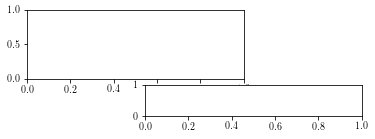

In [422]:
plt.subplot2grid([6,3],[0,0],rowspan=2,colspan=2)
plt.subplot2grid([6,3],[2,1],rowspan=1,colspan=2)
plt.show()

/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


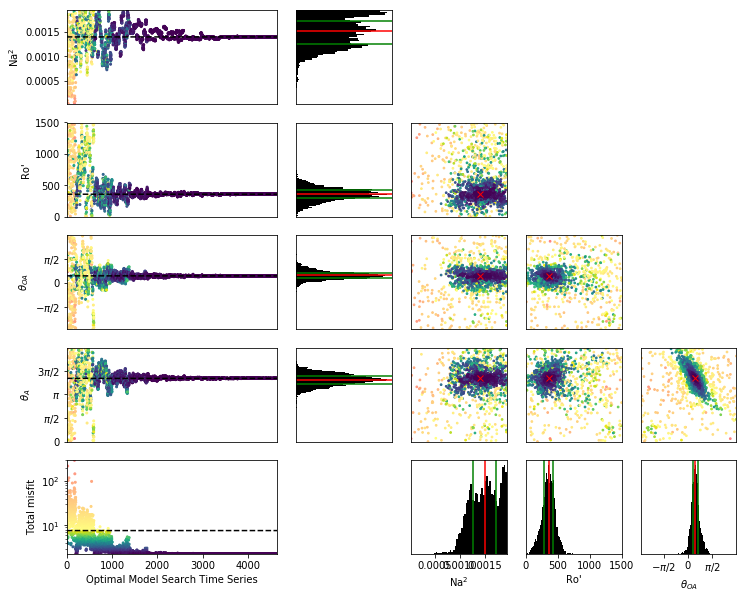

In [43]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-31/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
# colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
# colors = np.vstack((colors1, colors2))
colors = np.vstack((colors1,1-(1-colors2)*0.5))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# plt.imshow([colors], extent=[0, 10, 0, 1])
# plt.xticks([])
# plt.yticks([])
# plt.show()

# plot misfit
# cmin = 1e-10
# cmax = 1e2
no_bins = 50
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
f=plt.figure(figsize=[12,10])
plt.subplot2grid([5,6],[0,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
plt.xticks([])
# plt.savefig('misfit_all_100%.pdf')
plt.subplot2grid([5,6],[1,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
plt.xticks([])
plt.subplot2grid([5,6],[2,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{OA}$')
plt.yticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
plt.xticks([])
plt.subplot2grid([5,6],[3,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{A}$')
plt.yticks([0,np.pi/2,np.pi,3*np.pi/2],[0,r'$\pi /2$',r'$\pi $',r'$3\pi /2$'])
# plt.yticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
# plt.xlabel('Optimal Model Search Time Series')
plt.xticks([])

plt.subplot2grid([5,6],[4,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,np.max(data_NA['misfit'])])
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')
plt.xlabel('Optimal Model Search Time Series')

plt.subplot2grid([5,6],[0,2])
plt.hist(data_bayes[:,0],bins=no_bins,color='k',orientation='horizontal',normed='true')
# plt.axhline(np.mean(data_bayes[:,0]),color='r')
plt.axhline(inv_data_d[day_start-first_day,28],color='g')
plt.axhline(inv_data_d[day_start-first_day,29],color='r')
plt.axhline(inv_data_d[day_start-first_day,30],color='g')
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
# plt.ylabel(r'Na$^2$')
plt.yticks([])
plt.xticks([])
plt.subplot2grid([5,6],[1,2])
plt.hist(data_bayes[:,1],bins=no_bins,color='k',orientation='horizontal',normed='true')
# plt.axhline(np.mean(data_bayes[:,1]),color='r')
plt.axhline(inv_data_d[day_start-first_day,31],color='g')
plt.axhline(inv_data_d[day_start-first_day,32],color='r')
plt.axhline(inv_data_d[day_start-first_day,33],color='g')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
# plt.ylabel('Ro\'')
plt.yticks([])
plt.xticks([])
plt.subplot2grid([5,6],[2,2])
plt.hist(data_bayes[:,3],bins=no_bins,color='k',orientation='horizontal',normed='true')
# plt.axhline(np.mean(data_bayes[:,3]),color='r')
plt.axhline(inv_data_d[day_start-first_day,37],color='g')
plt.axhline(inv_data_d[day_start-first_day,38],color='r')
plt.axhline(inv_data_d[day_start-first_day,39],color='g')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
# plt.ylabel(r'$\theta_{OI}$')
plt.yticks([])
plt.xticks([])
plt.subplot2grid([5,6],[3,2])
plt.hist(data_bayes[:,2],bins=no_bins,color='k',orientation='horizontal',normed='true')
# plt.axhline(np.mean(data_bayes[:,2]),color='r')
plt.axhline(inv_data_d[day_start-first_day,34],color='g')
plt.axhline(inv_data_d[day_start-first_day,35],color='r')
plt.axhline(inv_data_d[day_start-first_day,36],color='g')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.yticks([])
plt.xticks([])
# plt.ylabel(r'$\theta_{A}$')
# plt.yticks([])
# x - Na y - Ro

# plot trade off
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
# f = plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])
# horizontal hists
plt.subplot2grid([5,6],[1,3])
# plt.subplot(4,4,1)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
# plt.plot(buoy_10d_m[0],buoy_10d_m[1],'xr',color = [1,0,1])
plt.xticks([])
plt.yticks([])
# # x - Na y - thA
# plt.subplot(4,4,6)
plt.subplot2grid([5,6],[2,3])
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.xticks([])
plt.yticks([])
# # plt.ylabel('thA-O')
# # plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
# # plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# plt.plot(buoy_10d_m[0],buoy_10d_m[2],'xr',color = [1,0,1])
# # x - Ro y - thA
plt.subplot2grid([5,6],[2,4])
# plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# # plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
# # plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# plt.plot(buoy_10d_m[1],buoy_10d_m[2],'xr',color = [1,0,1])
plt.xticks([])
plt.yticks([])
# # x - Na y - thO
# plt.subplot(4,4,10)
plt.subplot2grid([5,6],[3,3])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# # plt.ylabel('thO')
# # plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# plt.plot(buoy_10d_m[0],buoy_10d_m[3],'xr',color = [1,0,1])
# # x - Ro y - thO
# plt.subplot(4,4,11)
plt.subplot2grid([5,6],[3,4])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# # plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# plt.plot(buoy_10d_m[1],buoy_10d_m[3],'xr',color = [1,0,1])
# # x - thA y - thO
# plt.subplot(4,4,12)
plt.subplot2grid([5,6],[3,5])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['thA-O'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# # plt.plot([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['thA-O'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# plt.plot(buoy_10d_m[2],buoy_10d_m[3],'xr',color = [1,0,1])
# # bottom row histograms
# plt.subplot(4,4,14)
plt.subplot2grid([5,6],[4,3])
plt.hist(data_bayes[:,0],bins=no_bins,color='k',normed='true')
# plt.axvline(np.mean(data_bayes[:,0]),color='r')
plt.axvline(inv_data_d[day_start-first_day,28],color='g')
plt.axvline(inv_data_d[day_start-first_day,29],color='r')
plt.axvline(inv_data_d[day_start-first_day,30],color='g')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.xlabel(r'Na$^2$')
plt.yticks([])
# plt.subplot(4,4,15)
plt.subplot2grid([5,6],[4,4])
plt.hist(data_bayes[:,1],bins=no_bins,color='k',normed='true')
# plt.axvline(np.mean(data_bayes[:,1]),color='r')
plt.axvline(inv_data_d[day_start-first_day,31],color='g')
plt.axvline(inv_data_d[day_start-first_day,32],color='r')
plt.axvline(inv_data_d[day_start-first_day,33],color='g')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xlabel('Ro\'')
plt.yticks([])
plt.subplot2grid([5,6],[4,5])
# ax =plt.subplot(4,4,16)
plt.hist(data_bayes[:,3],bins=no_bins,color='k',normed='true')
# plt.axvline(np.mean(data_bayes[:,2]),color='r')
plt.axvline(inv_data_d[day_start-first_day,37],color='g')
plt.axvline(inv_data_d[day_start-first_day,38],color='r')
plt.axvline(inv_data_d[day_start-first_day,39],color='g')
plt.xlim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xlabel(r'$\theta_{OA}$')
plt.xticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
plt.yticks([])
# plt.subplot(4,4,14)
# plt.hist(data_NA['Na'],bins=100,color='k')
# plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
# plt.axvline(inv_data_d[dd,7],color='g')
# plt.axvline(inv_data_d[dd,8],color='g')
# plt.axvline(inv_data_d[dd,9],color='g')
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel(r'Na$^2$')
# plt.subplot(4,4,15)
# plt.hist(data_NA['Ro'],bins=100,color='k')
# plt.axvline(inv_data_d[dd,10],color='g')
# plt.axvline(inv_data_d[dd,11],color='g')
# plt.axvline(inv_data_d[dd,12],color='g')
# plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel('Ro\'')
# plt.subplot(4,4,16)
# plt.hist(data_NA['thO'],bins=100,color='k')
# plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
# plt.axvline(inv_data_d[dd,13],color='g')
# plt.axvline(inv_data_d[dd,14],color='g')
# plt.axvline(inv_data_d[dd,15],color='g')
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel(r'$\theta_{W}$')
# f.savefig(fig_location+'trade_off_BIG_geo_geo_SAT.pdf',format='pdf',bbox_inches='tight')
# f.savefig(fig_location+'trade_off_BIG_d5_geo_1d.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [131]:
# bayes markov chain trade off
no_bins = 50
c_range = 5
f = plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])
# horizontal hists
plt.subplot(4,4,1)
plt.hist(data_bayes[:,1],bins=no_bins,color='k',orientation='horizontal',normed='true')
plt.axhline(np.mean(data_bayes[:,1]),color='r')
plt.axhline(inv_data_d[day_start-first_day,31],color='g')
plt.axhline(inv_data_d[day_start-first_day,32],color='g')
plt.axhline(inv_data_d[day_start-first_day,33],color='g')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(data_bayes[:,2],bins=no_bins,color='k',orientation='horizontal',normed='true')
plt.axhline(np.mean(data_bayes[:,2]),color='r')
plt.axhline(inv_data_d[day_start-first_day,34],color='g')
plt.axhline(inv_data_d[day_start-first_day,35],color='g')
plt.axhline(inv_data_d[day_start-first_day,36],color='g')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylabel(r'$\theta_{W}$')
plt.subplot(4,4,9)
plt.hist(data_bayes[:,3],bins=no_bins,color='k',orientation='horizontal',normed='true')
plt.axhline(np.mean(data_bayes[:,3]),color='r')
plt.axhline(inv_data_d[day_start-first_day,37],color='g')
plt.axhline(inv_data_d[day_start-first_day,38],color='g')
plt.axhline(inv_data_d[day_start-first_day,39],color='g')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.ylabel(r'$\theta_{AW}$')
# x - Na y - Ro
plt.subplot(4,4,2)
plt.hist2d(data_bayes[:,0],data_bayes[:,1],bins=no_bins,cmap='YlGnBu')
plt.clim([0,c_range])
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
# plt.plot(nansen2_b,rossby_b,'xg')
# x - Na y - thA
plt.subplot(4,4,6)
plt.hist2d(data_bayes[:,0],data_bayes[:,2],bins=no_bins,cmap='YlGnBu')
plt.clim([0,c_range])
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# plt.plot(nansen2_b,thO_b,'xg')
# x - Ro y - thA
plt.subplot(4,4,7)
plt.hist2d(data_bayes[:,1],data_bayes[:,2],bins=no_bins,cmap='YlGnBu')
plt.clim([0,c_range])
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# plt.plot(rossby_b,thO_b,'xg')
# x - Na y - thO
plt.subplot(4,4,10)
plt.hist2d(data_bayes[:,0],data_bayes[:,3],bins=no_bins,cmap='YlGnBu')
plt.clim([0,c_range])
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# plt.plot(nansen2_b,thA_O_b,'xg')
# x - Ro y - thO
plt.subplot(4,4,11)
plt.hist2d(data_bayes[:,1],data_bayes[:,3],bins=no_bins,cmap='YlGnBu')
plt.clim([0,c_range])
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# plt.plot(rossby_b,thA_O_b,'xg')
# x - thA y - thO
plt.subplot(4,4,12)
plt.hist2d(data_bayes[:,2],data_bayes[:,3],bins=no_bins,cmap='YlGnBu')
plt.clim([0,c_range])
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# plt.plot(thO_b,thA_O_b,'xg')
# bottom row histograms
plt.subplot(4,4,14)
plt.hist(data_bayes[:,0],bins=no_bins,color='k',normed='true')
plt.axvline(np.mean(data_bayes[:,0]),color='r')
plt.axvline(inv_data_d[day_start-first_day,28],color='g')
plt.axvline(inv_data_d[day_start-first_day,29],color='g')
plt.axvline(inv_data_d[day_start-first_day,30],color='g')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(data_bayes[:,1],bins=no_bins,color='k',normed='true')
plt.axvline(np.mean(data_bayes[:,1]),color='r')
plt.axvline(inv_data_d[day_start-first_day,31],color='g')
plt.axvline(inv_data_d[day_start-first_day,32],color='g')
plt.axvline(inv_data_d[day_start-first_day,33],color='g')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xlabel('Ro\'')
ax =plt.subplot(4,4,16)
plt.hist(data_bayes[:,2],bins=no_bins,color='k',normed='true')
plt.axvline(np.mean(data_bayes[:,2]),color='r')
plt.axvline(inv_data_d[day_start-first_day,34],color='g')
plt.axvline(inv_data_d[day_start-first_day,35],color='g')
plt.axvline(inv_data_d[day_start-first_day,36],color='g')
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.xlabel(r'$\theta_{W}$')


# f.savefig(fig_location+'trade_off3.pdf',format='pdf',bbox__inches='tight')
plt.show()

IndexError: too many indices for array

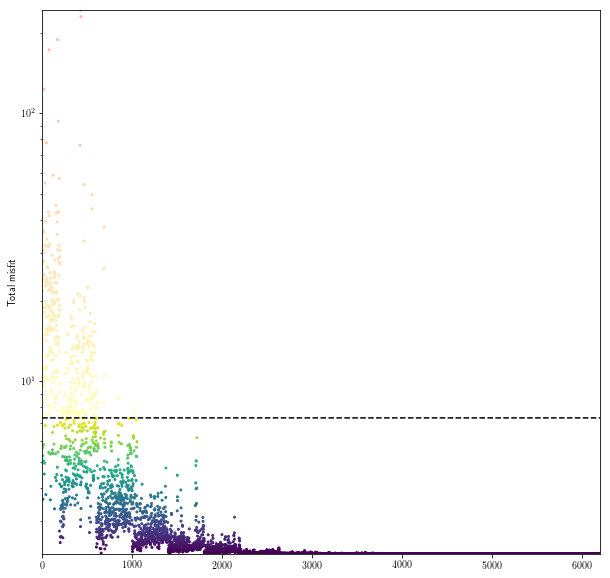

In [39]:
plt.figure(figsize=[10,10])
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,np.max(data_NA['misfit'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')
plt.show()

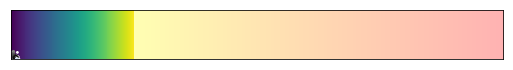

In [38]:

big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
# colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
colors = np.vstack((colors1,1-(1-colors2)*0.3))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.xticks([])
plt.yticks([])
plt.show()


In [217]:
# buoy_10d_m = []
# buoy_10d_m.append(data_NA['Na'][misfit_min_no])
# buoy_10d_m.append(data_NA['Ro'][misfit_min_no])
# buoy_10d_m.append(data_NA['thA-O'][misfit_min_no])
# buoy_10d_m.append(data_NA['thO'][misfit_min_no])
buoy_10d_m

[0.00064953352599999995, 95.639106799999993, 0.72998058799999999, 0.145185113]

In [32]:
nansen_calc = st.median(data_NA_cut[1,0:i_cut])
rossby_calc = st.median(data_NA_cut[2,0:i_cut])
thO_calc    = st.median(data_NA_cut[3,0:i_cut])
thA_O_calc  = st.median(data_NA_cut[4,0:i_cut])
print('Nansen calculated',(data_NA['Na'][misfit_min_no]),nansen_calc)
print('Nansen calculated',np.sqrt(data_NA['Na'][misfit_min_no]),np.sqrt(nansen_calc))
print('Rossby calculated',data_NA['Ro'][misfit_min_no],rossby_calc)
print('ThetaA calculated',
      np.rad2deg(data_NA['thA-O'][misfit_min_no]+data_NA['thO'][misfit_min_no]),np.rad2deg(thA_O_calc + thO_calc))
print('ThetaO calculated',np.rad2deg(data_NA['thO'][misfit_min_no]),np.rad2deg(thO_calc))
print('ThetaAO calculated',np.rad2deg(data_NA['thA-O'][misfit_min_no]),np.rad2deg(thA_O_calc))
print('Ca calculated',(data_NA['Na'][misfit_min_no]/data_NA['Ro'][misfit_min_no])*(rhoi/rhoa))
print('Co calculated',(rhoi/rhoo)/data_NA['Ro'][misfit_min_no])
print('Ca calculated',(nansen_calc/rossby_calc*(rhoi/rhoa)))
print('Co calculated',(rhoi/rhoo)/rossby_calc)

Nansen calculated 0.00139510597 0.00140723563
Nansen calculated 0.0373511173862 0.0375131394314
Rossby calculated 360.568329 360.697739
ThetaA calculated 267.742172467 267.735758749
ThetaO calculated 241.49294955 241.4603557
ThetaAO calculated 26.2492229175 26.2754030494
Ca calculated 0.00283843492974
Co calculated 0.00247875953419
Ca calculated 0.00286208630259
Co calculated 0.00247787021264


In [33]:
print('Na B',inv_data_d[dd,20],' +- ',inv_data_d[dd,24])
print('qaurtiles: ',inv_data_d[dd,28:31])
print('Ro B',inv_data_d[dd,21],' +- ',inv_data_d[dd,25])
print('qaurtiles: ',inv_data_d[dd,31:34])
print('thOA B',np.rad2deg(inv_data_d[dd,22]),' +- ',np.rad2deg(inv_data_d[dd,26]))
print('qaurtiles: ',np.rad2deg(inv_data_d[dd,34:37]))
print('thA B',np.rad2deg(inv_data_d[dd,23]),' +- ',np.rad2deg(inv_data_d[dd,27]))
print('qaurtiles: ',np.rad2deg(inv_data_d[dd,37:40]))
print('Ca bayes',(inv_data_d[dd,20]/inv_data_d[dd,21])*(rhoi/rhoa))
#       *np.array([1.0,inv_data_d[dd,21]/inv_data_d[dd,20]])
print('Co bayes',((rhoi/rhoo)/inv_data_d[dd,21])*np.array([1.0,0.000358*inv_data_d[dd,21]]))

Na B 0.0017100393244  +-  0.000940555896264
qaurtiles:  [ 0.00096237  0.00157736  0.00241527]
Ro B 810.99770414  +-  441.084216237
qaurtiles:  [  421.26317575   848.8400575   1201.2258025 ]
thOA B 46.7550090946  +-  52.9002977872
qaurtiles:  [ 16.18534216  46.88626384  79.71557506]
thA B 37.1783622124  +-  65.8448066218
qaurtiles:  [ -6.08781931  38.40075105  82.62593725]
Ca bayes 0.00154684142998
Co bayes [ 0.00110205  0.00031997]


In [ ]:
# # disassemble vectors
# # forcing_1
# vec_strd = 5
# all_vecs = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd+1),nbals,5],float)
# jj = 0
# for j in range(it1,data_NA['number'][-1],vec_strd):
# # for j in range(misfit_min_no,misfit_min_no+1):
#     for i in range(nbals):
#         all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_i_o_mag(
#                           data_mean_big[day_start+i,0,d_w],data_mean_big[day_start+i,1,d_w],
#                           data_NA['Na'][j],data_NA['Ro'][j]*-data_in[1+11*nbals+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#         all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.i_o_mag(
#                           data_mean_single[day_start+i,2],data_mean_single[day_start+i,3],
#                           data_NA['Na'][j],data_NA['Ro'][j]*-data_in[1+11*nbals+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#         all_vecs[jj,i,4] = data_NA['misfit'][j]
#     jj += 1
# #     print(jj,j)
# j = misfit_min_no
# for i in range(nbals):
#     all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_i_o_mag(
#                           data_mean_big[day_start+i,0,d_w],data_mean_big[day_start+i,1,d_w],
#                           data_NA['Na'][j],data_NA['Ro'][j]*data_in[1+11*nbals+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#     all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.i_o_mag(
#                           data_mean_single[day_start+i,2],data_mean_single[day_start+i,3],
#                           data_NA['Na'][j],data_NA['Ro'][j]*data_in[1+11*nbals+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#     all_vecs[jj,i,4] = data_NA['misfit'][j]
        

In [44]:
# disassemble vectors D5 GEO TOO
# just the cut list
# forcing_1
# dd = 66
day_start = inv_list_d[dd,1]
#     print('Inverting day ',day_start,', no ',dd,' of ',list_d)
nbals_use = inv_list_d[dd,0]
vec_strd = 5
all_vecs = np.empty([int( i_cut/vec_strd)+2,nbals,7],float)
all_vecsA = np.empty([nbals,6],float)
all_forces = np.empty([nbals,6],float)
all_forces0 = np.empty([nbals,6],float)
all_forcesA = np.empty([nbals,6],float)
jj = 0
for j in range(0,i_cut-1,vec_strd):
# for j in range(misfit_min_no,misfit_min_no+1):
    for i in range(nbals_use):
#         i = bal_p[j]
#         i = bal_all[dd+j]-day_start
#         inv_list_d[dd,1+j] = day_start + i
        ii = inv_list_d[dd,i+1] - day_start
#         ii = bal_p[i]
        all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_mag_geo(
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          data_NA_cut[1,j],data_NA_cut[2,j]*data_in[1+16*nbals_use+i],
#                           data_NA_cut[4,j]+data_NA_cut[3,j],data_NA_cut[3,j])
                          data_NA_cut[3,j],data_NA_cut[4,j]+data_NA_cut[3,j])
#                           0,data_NA_cut[4,j])
        all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.o_i_mag_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          data_NA_cut[1,j],data_NA_cut[2,j]*data_in[1+16*nbals_use+i],
#                           data_NA_cut[4,j]+data_NA_cut[3,j],data_NA_cut[3,j])
                          data_NA_cut[3,j],data_NA_cut[4,j]+data_NA_cut[3,j])
#                           0,data_NA_cut[4,j])
        all_vecs[jj,i,4],all_vecs[jj,i,5] = freedrift.geo_mag_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
                          data_NA_cut[1,j],data_NA_cut[2,j]*data_in[1+16*nbals_use+i],
#                           data_NA_cut[4,j]+data_NA_cut[3,j],data_NA_cut[3,j])
                          data_NA_cut[3,j],data_NA_cut[4,j]+data_NA_cut[3,j])
#                           0,data_NA_cut[4,j])
        all_vecs[jj,i,6] = data_NA_cut[5,j]
    jj += 1
#     print(jj,j)
j = misfit_min_no
for i in range(nbals_use):
    ii = inv_list_d[dd,i+1] - day_start
#     ii = bal_p[i]
    all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_mag_geo(
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
                          data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
#                           data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          data_NA['Na'][j],data_NA['Ro'][j]*data_in[1+16*nbals_use+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#                           data_NA['thO'][j],data_NA['thA-O'][j]+data_NA['thO'][j])
                          0,data_NA['thA-O'][j])
    all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.o_i_mag_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
#                           data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          data_NA['Na'][j],data_NA['Ro'][j]*data_in[1+16*nbals_use+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
                          data_NA['thO'][j],data_NA['thA-O'][j]+data_NA['thO'][j])
#                           0,data_NA['thA-O'][j])
    all_vecs[jj,i,4],all_vecs[jj,i,5] = freedrift.geo_mag_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
                          data_NA['Na'][j],data_NA['Ro'][j]*data_in[1+16*nbals_use+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
                          data_NA['thO'][j],data_NA['thA-O'][j]+data_NA['thO'][j])
#                           0,data_NA['thA-O'][j])
    all_vecs[jj,i,6] = data_NA_cut[5,j]
    vec_plot = jj
    all_vecsA[i,0],all_vecsA[i,1] = freedrift.wnd_mag_geo(
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          (rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+16*nbals_use+i],
                          np.deg2rad(5),np.deg2rad(23))
    all_vecsA[i,2],all_vecsA[i,3] = freedrift.o_i_mag_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          (rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+16*nbals_use+i],
                          np.deg2rad(5),np.deg2rad(23))
    all_vecsA[i,4],all_vecsA[i,5] = freedrift.geo_mag_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
                          (rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+16*nbals_use+i],
                          np.deg2rad(5),np.deg2rad(23))
    all_forces[i,:] = freedrift.force_bal_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*data_in[1+16*nbals_use+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
                          data_NA['thO'][j],data_NA['thA-O'][j]+data_NA['thO'][j])
    all_forces0[i,:] = freedrift.force_bal_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*data_in[1+16*nbals_use+i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#                           data_NA['thO'][j],data_NA['thA-O'][j]+data_NA['thO'][j])
                          0,data_NA['thA-O'][j])
    all_forcesA[i,:] = freedrift.force_bal_geo(
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          data_mean_5[day_start+ii,2],data_mean_5[day_start+ii,3],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_mean_geo[day_start+ii,10],data_mean_geo[day_start+ii,11],
                          rhoa*1.5e-3,rhoo*5.5e-3,rhoi*data_in[1+16*nbals_use+i],
                          np.deg2rad(5),np.deg2rad(23))
#                           data_NA_cut[3,j],data_NA_cut[4,j]+data_NA_cut[3,j])
#                           0,-data_NA['thA-O'][j])
        

In [35]:
all_forces[:,0],all_forcesA[:,0]

(array([  1.35077050e-002,   6.60352432e-002,   1.00212759e-002,
          1.86538334e-002,  -1.71182492e-003,  -1.31076947e-001,
          1.11761999e-001,   5.59632818e-002,   8.44674579e-002,
          2.14321575e-312]),
 array([ -9.81764090e-003,  -4.36488407e-002,  -9.24806160e-003,
          6.92045172e-003,   2.68584142e-002,   5.84439002e-002,
         -3.69774642e-002,  -7.08055705e-003,   6.13462670e-003,
          2.37570853e-313]))

In [36]:
wnd_range = 1.4*np.max(data_mean_single[day_start:inv_list_d[dd,nbals_use]+1,4])
wnd_range*wnd_scale

NameError: name 'wnd_scale' is not defined

False

Forces
Forces
Forces
Forces


/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


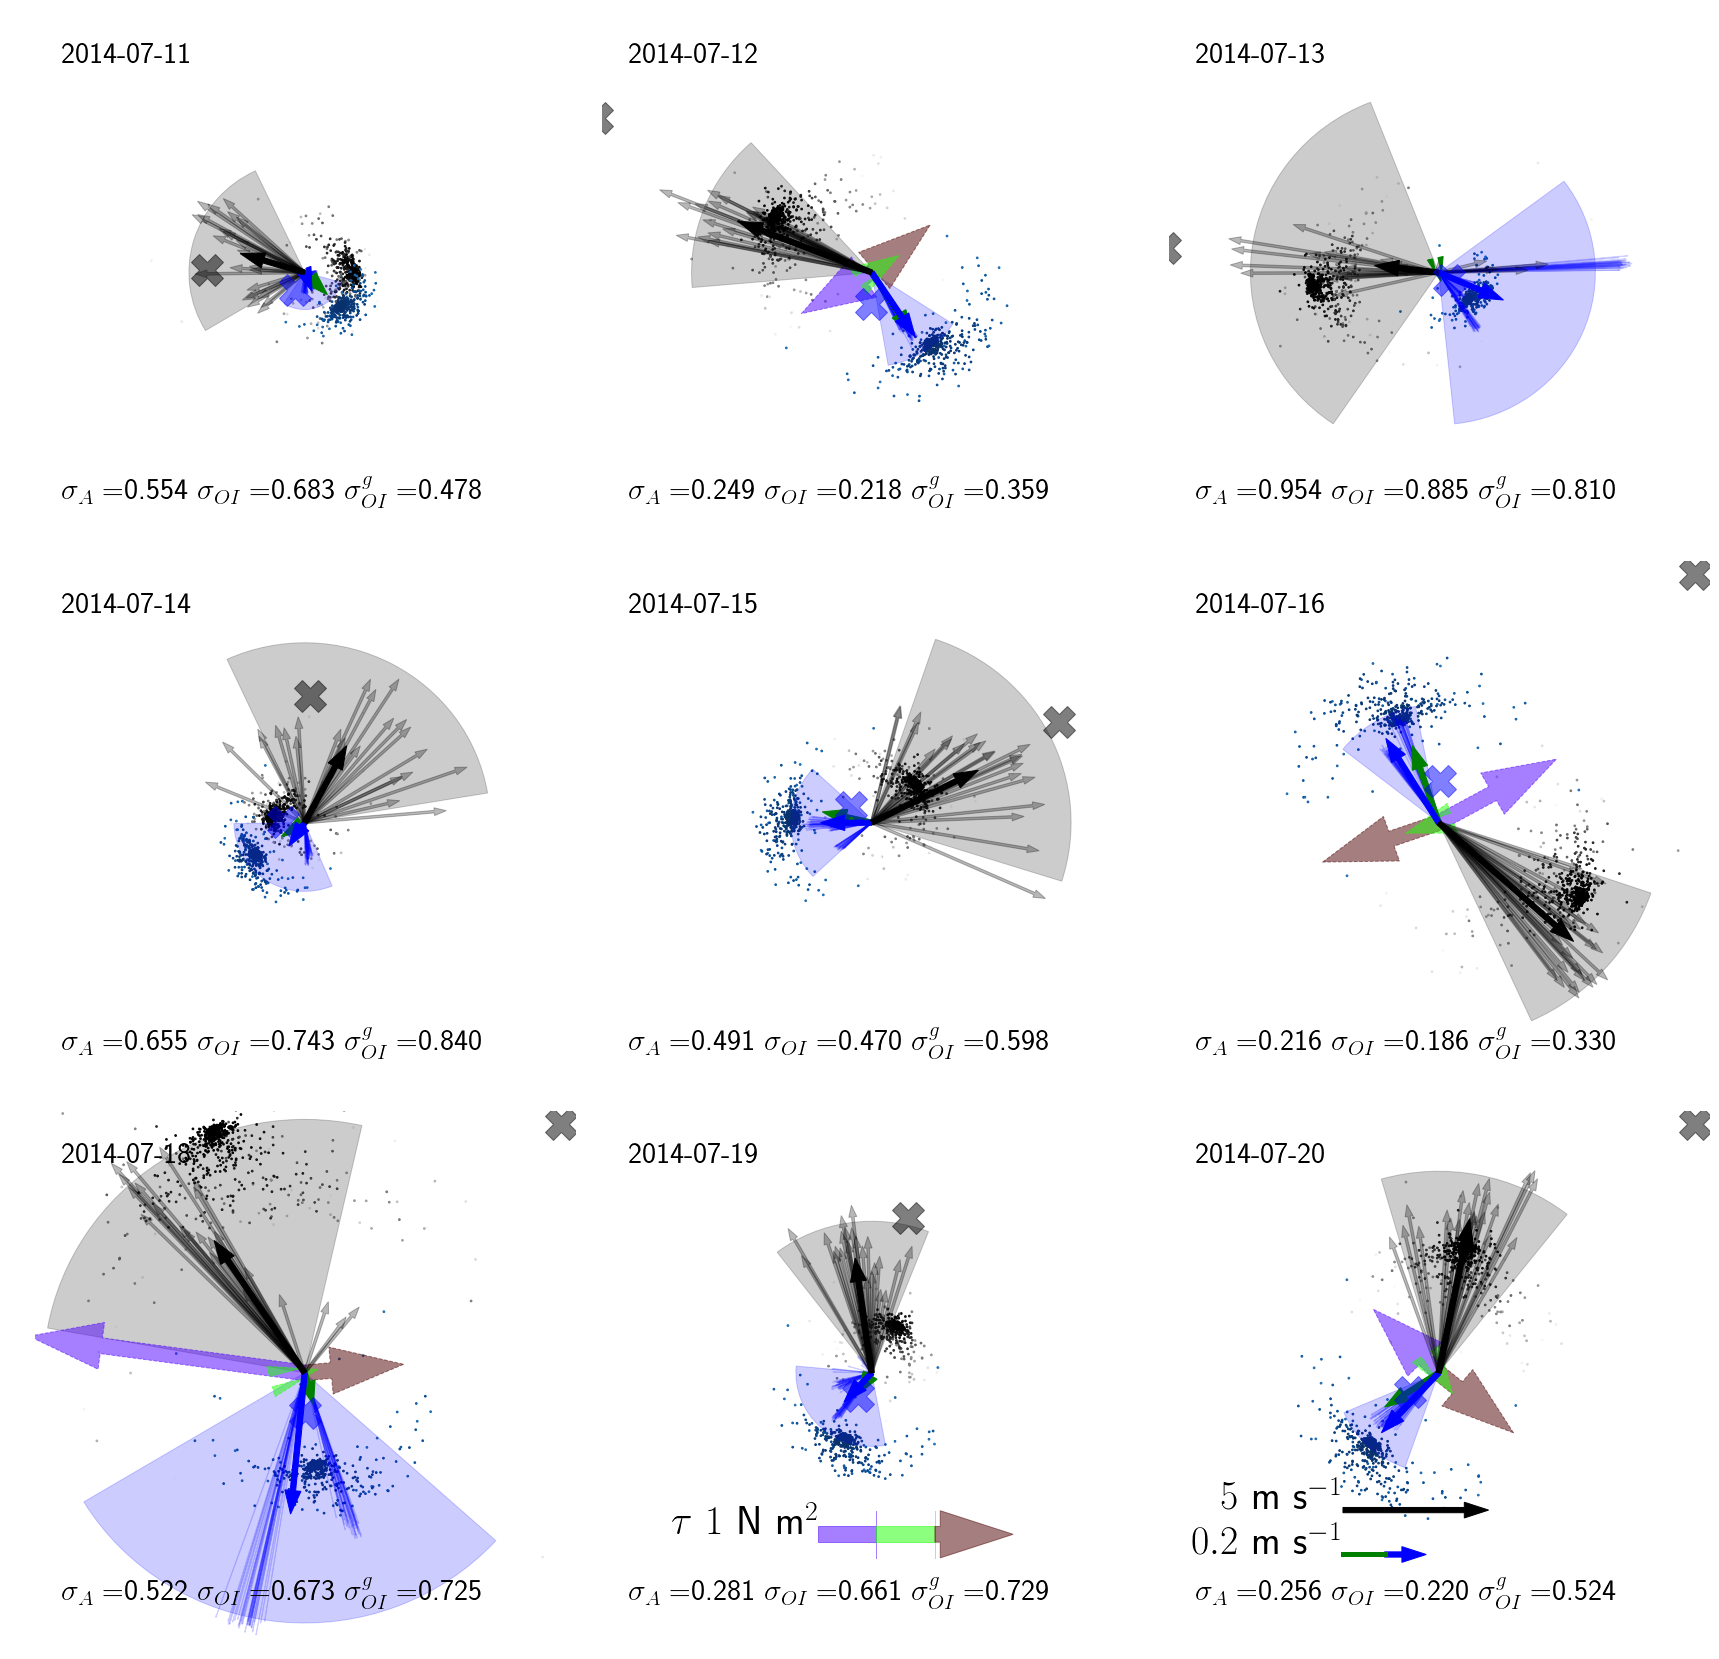

In [46]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-31/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# WIND BLACK, D5 BLUE, GEO GREEN
# want arrows for the obs and best, scatter all the rest with mymap
# put in a single force arrow for the best too
n_days_temp = n_days
# dd = 66
day_start = inv_list_d[dd,1]
nbals_use = inv_list_d[dd,0]
# wnd_range = 1.4*np.max(data_mean_single[day_start:inv_list_d[dd,nbals_use]+1,4])
wnd_range = 1.4*np.max(np.hypot(data_mean_single[day_start:inv_list_d[dd,nbals_use]+1,2],
                                data_mean_single[day_start:inv_list_d[dd,nbals_use]+1,3]))
wnd_range = 1.05*np.max(np.maximum(all_vecs[vec_plot,0:nbals_use,0:2],wnd_range))
wnd_scale = 0.07
force_scale = 0.47
weight = 0.02*wnd_range*wnd_scale
#     print('Inverting day ',day_start,', no ',dd,' of ',list_d)
# wnd_range = np.max(wind_mag)
# wnd_range = 0.99*np.max(np.maximum(all_vecs[-1,:,0:2],wnd_range))
# wnd_scale = 0.04
f = plt.figure(figsize=[30,40])
plt.rc('text', usetex=True)
for nb in range(0,nbals_use):
# for nb in range(0,1):
    ax = plt.subplot(4,3,nb+1)
#     #   calculated vectors
    plt.scatter(wnd_scale*all_vecs[0:vec_plot,nb,0],wnd_scale*all_vecs[0:vec_plot,nb,1],
                c=np.log(all_vecs[0:vec_plot,nb,6]),s=3,cmap='Greys_r')
    plt.scatter(all_vecs[0:vec_plot,nb,2],all_vecs[0:vec_plot,nb,3],
                c=np.log(all_vecs[0:vec_plot,nb,6]),s=3,cmap='Blues_r')
#     plt.scatter(all_vecs[0:vec_plot,nb,4],all_vecs[0:vec_plot,nb,5],
#                 c=np.log(all_vecs[0:vec_plot,nb,6]),s=3,cmap='Greens_r')
    plt.clim(np.log([cmin,cmax]))
    # AIDJEX predictions
    plt.plot(wnd_scale*all_vecsA[nb,0],wnd_scale*all_vecsA[nb,1],
                'Xk',markersize=32,alpha=0.5)
    plt.plot(all_vecsA[nb,2],all_vecsA[nb,3],
                'Xb',markersize=32,alpha=0.5)
#     plt.plot(all_vecsA[nb,4],all_vecsA[nb,5],
#                 'Xg',markersize=32,alpha=0.5)
    if nb in [5,6,8]: # black aidjex out of bounds
        plt.plot(0.95*wnd_range*wnd_scale,0.95*wnd_range*wnd_scale,
                'Xk',markersize=32,alpha=0.5)
#     if nb in [5,6,9]:
#     if nb in [2,5,6,8]: # green aidjex out of bounds
#         plt.plot(0.95*wnd_range*wnd_scale,0.85*wnd_range*wnd_scale,
#                 'Xg',markersize=32,alpha=0.5)
    # force vectors
    if nb in [1,5,6,8]:
        print('Forces')
    #     force_scale = np.hypot(all_forces[nb,0],all_forces[nb,1])/wnd_range/wnd_scale*2
        plt.arrow(0.0,0.0,all_forces[nb,0]/force_scale,all_forces[nb,1]/force_scale,
                   length_includes_head = 'true',linestyle='dashed',color=[0.3,0,0],alpha = 0.5,width=weight*3)
    #     force_scale = np.hypot(all_forces[nb,2],all_forces[nb,3])/wnd_range/wnd_scale*2
        plt.arrow(0.0,0.0,all_forces[nb,2]/force_scale,all_forces[nb,3]/force_scale,
                   length_includes_head = 'true',linestyle='dashed',color=[0.3,0,1],alpha = 0.5,width=weight*3)
    #     force_scale = np.hypot(all_forces[nb,4],all_forces[nb,5])/wnd_range/wnd_scale*2
        plt.arrow(0.0,0.0,all_forces[nb,4]/force_scale,all_forces[nb,5]/force_scale,
                   length_includes_head = 'true',linestyle='dashed',color=[0.1,1,0],alpha = 0.5,width=weight*2)
#     # force vectors ZEROED TO WIND
#     force_scale = np.hypot(all_forces[nb,0],all_forces[nb,1])/wnd_range/wnd_scale*2
#     plt.arrow(0.0,0.0,all_forces0[nb,0]/force_scale,all_forces0[nb,1]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.5,width=weight*2)
# #     force_scale = np.hypot(all_forces[nb,2],all_forces[nb,3])/wnd_range/wnd_scale*2
#     plt.arrow(0.0,0.0,all_forces0[nb,2]/force_scale,all_forces0[nb,3]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.5,width=weight*2)
# #     force_scale = np.hypot(all_forces[nb,4],all_forces[nb,5])/wnd_range/wnd_scale*2
#     plt.arrow(0.0,0.0,all_forces0[nb,4]/force_scale,all_forces0[nb,5]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='g',alpha = 0.5,width=weight*2)
    ## AIDJEX comparisons
#     plt.arrow(0.0,0.0,all_forcesA[nb,0]/force_scale,all_forcesA[nb,1]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.3,width=weight*2)
# #     force_scale = np.hypot(all_forces[nb,2],all_forces[nb,3])/wnd_range/wnd_scale*2
#     plt.arrow(0.0,0.0,all_forcesA[nb,2]/force_scale,all_forcesA[nb,3]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.3,width=weight*2)
# #     force_scale = np.hypot(all_forces[nb,4],all_forces[nb,5])/wnd_range/wnd_scale*2
#     plt.arrow(0.0,0.0,all_forcesA[nb,4]/force_scale,all_forcesA[nb,5]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='g',alpha = 0.3,width=weight*2)
    # best vectors
#     plt.arrow(0.0,0.0,wnd_scale*all_vecs[vec_plot,nb,0],wnd_scale*all_vecs[vec_plot,nb,1],
#                length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.7,width=weight/2)
#     plt.arrow(0.0,0.0,all_vecs[vec_plot,nb,2],all_vecs[vec_plot,nb,3],
#                length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.7,width=weight/2)
#     plt.arrow(0.0,0.0,all_vecs[vec_plot,nb,4],all_vecs[vec_plot,nb,5],
#                length_includes_head = 'true',linestyle='dashed',color='g',alpha = 0.7,width=weight/2)
#     plt.clim(np.log([misfit_min,misfit_cut]))
#     # best vectors
#     plt.arrow(0.0,0.0,wnd_scale*all_vecs[vec_plot,nb,0],wnd_scale*all_vecs[vec_plot,nb,1],
#                length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.7)
#     plt.arrow(0.0,0.0,-all_vecs[vec_plot,nb,2],-all_vecs[vec_plot,nb,3],
#                length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.7)
# #     #   original vectors
#     plt.arrow(0,0,wnd_scale*data_mean_single[day_start+nb,2],wnd_scale*data_mean_single[day_start+nb,3],
#               color='k',length_includes_head = 'true',width=weight)
#     plt.arrow(0,0,data_mean_big[day_start+nb,0,d_w],data_mean_big[day_start+nb,1,d_w],
#               color='b',length_includes_head = 'true',width=weight)
    plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
    plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
    
    jj = inv_list_d[dd,nb+1]
    
    ax.add_patch(
        patches.Wedge(
            (0, 0),         # (x,y)
            data_mean_5[jj,4]*(1+data_std_5[jj,3]/data_mean_5[jj,4]),            # radius
            np.rad2deg(np.arctan2(data_mean_5[jj,3],data_mean_5[jj,2])
                       -np.arctan2(2*data_std_5[jj,3],data_mean_5[jj,4])), 
            np.rad2deg(np.arctan2(data_mean_5[jj,3],data_mean_5[jj,2])
                       +np.arctan2(2*data_std_5[jj,3],data_mean_5[jj,4])), 
            color="b", alpha=0.2
                    ))
    ax.add_patch(
        patches.Wedge(
            (0, 0),         # (x,y)
            wnd_scale*data_mean_single[jj,4]*(1
                            +data_std_single[jj,7]/data_mean_single[jj,4]),            # radius
            np.rad2deg(np.arctan2(data_mean_single[jj,3],data_mean_single[jj,2])
                       -np.arctan2(2*data_std_single[jj,7],data_mean_single[jj,4])), 
            np.rad2deg(np.arctan2(data_mean_single[jj,3],data_mean_single[jj,2])
                       +np.arctan2(2*data_std_single[jj,7],data_mean_single[jj,4])), 
            color="k", alpha=0.2
                    ))
    
    n_days = 2*n_days
    # # individual vectors
#     if (data_ranges[jj,6] < data_ranges[jj,7]):
#         geo_s = (data_ranges[jj,7]-data_ranges[jj,6]+1)/(data_ranges[jj,1]-data_ranges[jj,0]+1) 
#         for i in range(data_ranges[jj,0],data_ranges[jj,1],int(n_days/2)+1):
#             for d in range(-2,1):
#                 geo_p = data_ranges[jj,6] + int((i - data_ranges[jj,0])*geo_s) 
#                 val[0] = refdepth[0,geo_p+d]
#                 val[1] = u[val[0],i]
#                 val[2] = v[val[0],i]
#                 plt.arrow(0,0,val[1],val[2],alpha=0.3/np.sqrt(n_days),color='g',width=weight/2)
    for i in range(data_ranges[jj,4],data_ranges[jj,5]):
        for k in range(0,1000,30*n_days_temp ):
            plt.arrow(0,0,u_5[i,k],v_5[i,k],alpha=0.2/np.sqrt(n_days),color='b')
    for i in range(data_ranges[jj,2],data_ranges[jj,3],int(n_days_temp /2)+1):
#         val[2] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         val[3] =  np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         val[2] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         val[3] = -np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
# #       # third attempt, from looking at the aws mat file
# #       bearing is angle from west, clockwise, to where the wind is going
# #       or from east, anticlockwise, to where the wind is from
        val[2] = -np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
        val[3] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
        plt.arrow(0,0,wnd_scale*val[2],wnd_scale*val[3],alpha=0.4/np.sqrt(n_days),color='k',width=weight/2)
    
    
    n_days= n_days_temp 
    # FANS INSTEAD OF INDIVIDUAL MEASUREMENTS
    
#     # # mean obs vectors
    plt.arrow(0,0,data_mean_geo[jj,10],data_mean_geo[jj,11],
              color='g',length_includes_head = 'true',width=weight)
    plt.arrow(0,0,data_mean_5[jj,2],data_mean_5[jj,3],
              color='b',length_includes_head = 'true',width=weight)
    plt.arrow(0,0,wnd_scale*data_mean_single[jj,2],wnd_scale*data_mean_single[jj,3],
              color='k',length_includes_head = 'true',width=weight)
# #     plt.arrow(-wnd_scale/2,-wind_mag[nb]*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wind_mag[nb]*wnd_scale/4,wnd_scale,0,
# # #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-wnd_range*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wnd_range*wnd_scale/4,wnd_scale,0,
# #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.text(wnd_scale,-wind_mag[nb]*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
# #     plt.text(wnd_scale,-3*wind_mag[nb]*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-wnd_range*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-3*wnd_range*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
# need scale arrows on the first pane plus Drag parameters

# need error values wind and currents to show the attempted fit.
    plt.text(-0.9*wnd_range*wnd_scale,0.8*wnd_range*wnd_scale,
#             "Sig A "+str(data_std_single[ day_start+nb,7]/data_mean_single[day_start+nb,4]))
            (d150_tstart[d150_start]+datetime.timedelta(days=int(1+jj*day_strd))).strftime('%Y-%m-%d'),fontsize=30)
    plt.text(-0.9*wnd_range*wnd_scale,-0.9*wnd_range*wnd_scale,
            r"$\sigma_A = $"+'{0:.{1}f}'.format(data_std_single[jj,7]/data_mean_single[jj,4], 3)
            +r" $\sigma_{OI} = $"+'{0:.{1}f}'.format(data_std_5[jj,3]/data_mean_5[jj,4], 3)
            +r" $\sigma^g_{OI} = $"+'{0:.{1}f}'.format(data_std_geo[jj,3]/data_mean_geo[jj,3], 3),fontsize=30)
    ax.axis('off')
ax = plt.subplot(4,3,8)
# wnd_range = wnd_range/2
plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])

ax.axis('off')
plt.arrow(-0.13,-0.4,force_scale*0.3,0,head_length = 0,
              alpha=0.5,color=[0.3,0,1],width = weight*3,length_includes_head = 'true',)
plt.arrow(-0.13+force_scale*0.3,-0.4,force_scale*0.3,0,head_length = 0,
              alpha=0.5,color=[0.1,1,0],width = weight*3,length_includes_head = 'true',)
plt.arrow(-0.13+force_scale*0.6,-0.4,force_scale*(1e0-0.6),0,
              alpha=0.5,color=[0.3,0,0],width = weight*3,length_includes_head = 'true')
# plt.arrow(-0.13,-0.4,force_scale*1,0,
#               alpha=0.5,color='k',width = weight*3,length_includes_head = 'true')
plt.text(-0.13,-0.4,
            r'$\tau$  $1$ N m$^2$',fontsize=40,horizontalalignment='right')
ax = plt.subplot(4,3,9)
plt.arrow(-0.23,-0.34,5*wnd_scale,0,
              color='k',width = weight,length_includes_head = 'true')
plt.text(-0.23,-0.34,
             r'$5$ m s$^{-1}$',fontsize=40,horizontalalignment='right')
plt.plot([-0.23,-0.13],[-0.45,-0.45],'g',linewidth = 5)
plt.arrow(-0.13,-0.45,0.1,0,
              color='b',width = weight,length_includes_head = 'true')
plt.text(-0.23,-0.45,
             r'$0.2$ m s$^{-1}$',fontsize=40,horizontalalignment='right')

plt.subplots_adjust(hspace=0.05,wspace=0.05)    
f.savefig(fig_location+'vec_fit+forces_d5_geo_1d_fans_arrows.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [41]:
day_start=3
ii=2
i=0
j=4000
freedrift.wnd_o_i_mag(
#                           GEO_W[day_start+ii,0] - DRIFT[day_start+ii,0],GEO_W[day_start+ii,1] - DRIFT[day_start+ii,1],
                          data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
#                           data_NA_cut[1,j],data_NA_cut[2,j]*data_in[1+11*nbals_use+i],
#                           0,0)
                          (rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+11*nbals_use+i],
                          data_NA_cut[3,j],data_NA_cut[4,j]+data_NA_cut[3,j])

(-8.1766403420970146, 37.294891983990055)

In [147]:
j = 4285
[(rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+11*nbals_use+i],
data_NA_cut[1,j],data_NA_cut[2,j]*data_in[1+11*nbals_use+i],
#                           data_NA_cut[4,j]+data_NA_cut[3,j],data_NA_cut[3,j])
                          data_NA_cut[3,j],data_NA_cut[4,j]+data_NA_cut[3,j]]
j = misfit_min_no
data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*data_in[1+11*nbals_use+i],data_NA['thO'][j],data_NA['thA-O'][j]+data_NA['thO'][j]



(0.0015720317995041768,
 4.7603030139996099,
 90.08378029614687,
 4.91581869,
 4.8983303296000003)

In [225]:
# disassemble vectors GEO GEO TOO
# just the cut list
# forcing_1
# dd = 100
day_start = inv_list_d[dd,1]
#     print('Inverting day ',day_start,', no ',dd,' of ',list_d)
nbals_use = inv_list_d[dd,0]
vec_strd = 5
all_vecs = np.empty([int( i_cut/vec_strd)+2,nbals,5],float)
all_vecsA = np.empty([nbals_use,6],float)
all_vecsB = np.empty([nbals_use,6],float)
all_forces = np.empty([nbals_use,6],float)
all_forces0 = np.empty([nbals_use,6],float)
all_forcesA = np.empty([nbals_use,6],float)
jj = 0
for j in range(0,i_cut-1,vec_strd):
# for j in range(misfit_min_no,misfit_min_no+1):
#     print(j)
    for i in range(nbals_use):
#         i = bal_p[j]
#         i = bal_all[dd+j]-day_start
#         inv_list_d[dd,1+j] = day_start + i
        ii = inv_list_d[dd,i+1] - day_start
#         ii = bal_p[i]
        all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_o_i_mag(
#                           GEO_W[day_start+ii,0] - DRIFT[day_start+ii,0],GEO_W[day_start+ii,1] - DRIFT[day_start+ii,1],
                          SATOI_mean[day_start+ii,0],SATOI_mean[day_start+ii,1],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_NA_cut[1,j],data_NA_cut[2,j]*data_in[1+11*nbals_use+i],
#                           data_NA_cut[4,j]+data_NA_cut[3,j],data_NA_cut[3,j])
                          data_NA_cut[3,j],data_NA_cut[4,j]+data_NA_cut[3,j])
        all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.o_i_mag(
#                           ERA_U[day_start+ii,0],ERA_U[day_start+ii,1],
                          ERA_U_mean[day_start+ii,0],ERA_U_mean[day_start+ii,1],
#                           data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          data_NA_cut[1,j],data_NA_cut[2,j]*data_in[1+11*nbals_use+i],
                          data_NA_cut[3,j],data_NA_cut[4,j]+data_NA_cut[3,j])
        all_vecs[jj,i,4] = data_NA_cut[5,j]
    jj += 1
#     print(jj,j)
j = misfit_min_no
for i in range(nbals_use):
    ii = inv_list_d[dd,i+1] - day_start
#     ii = bal_p[i]
    all_vecsA[i,0],all_vecsA[i,1] = freedrift.wnd_o_i_mag(
#                           GEO_W[day_start+ii,0] - DRIFT[day_start+ii,0],GEO_W[day_start+ii,1] - DRIFT[day_start+ii,1],
                          SATOI_mean[day_start+ii,0],SATOI_mean[day_start+ii,1],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          (rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+11*nbals_use+i],
#                           0,0)
                          np.deg2rad(0),np.deg2rad(18))
    all_vecsA[i,2],all_vecsA[i,3] = freedrift.o_i_mag(
#                           ERA_U[day_start+ii,0],ERA_U[day_start+ii,1],
                          ERA_U_mean[day_start+ii,0],ERA_U_mean[day_start+ii,1],
#                           data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          (rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+11*nbals_use+i],
#                           0,0)
                          np.deg2rad(0),np.deg2rad(18))
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecsB[i,0],all_vecsB[i,1] = freedrift.wnd_o_i_mag(
#                           GEO_W[day_start+ii,0] - DRIFT[day_start+ii,0],GEO_W[day_start+ii,1] - DRIFT[day_start+ii,1],
#                           SATOI_mean[day_start+ii,0],SATOI_mean[day_start+ii,1],
                          data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          buoy_10d_m[0],buoy_10d_m[1]*data_in[1+11*nbals_use+i],
                          buoy_10d_m[3],buoy_10d_m[2]+buoy_10d_m[3])
#                           np.deg2rad(5),np.deg2rad(23))
    all_vecsB[i,2],all_vecsB[i,3] = freedrift.o_i_mag(
#                           ERA_U[day_start+ii,0],ERA_U[day_start+ii,1],
#                           ERA_U_mean[day_start+ii,0],ERA_U_mean[day_start+ii,1],
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          buoy_10d_m[0],buoy_10d_m[1]*data_in[1+11*nbals_use+i],
                          buoy_10d_m[3],buoy_10d_m[2]+buoy_10d_m[3])
    vec_plot = jj - 1
    all_forces[i,:] = freedrift.force_bal(
#                           ERA_U[day_start+ii,0],ERA_U[day_start+ii,1],
                          ERA_U_mean[day_start+ii,0],ERA_U_mean[day_start+ii,1],
#                           data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
#                           GEO_W[day_start+ii,0] - DRIFT[day_start+ii,0],GEO_W[day_start+ii,1] - DRIFT[day_start+ii,1],
                          SATOI_mean[day_start+ii,0],SATOI_mean[day_start+ii,1],
#                           data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*data_in[1+11*nbals_use+i],
                          data_NA['thO'][j],data_NA['thA-O'][j]+data_NA['thO'][j])
        
    all_forces0[i,:] = freedrift.force_bal(
#                           ERA_U[day_start+ii,0],ERA_U[day_start+ii,1],
#                           ERA_U_mean[day_start+ii,0],ERA_U_mean[day_start+ii,1],
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
#                           GEO_W[day_start+ii,0] - DRIFT[day_start+ii,0],GEO_W[day_start+ii,1] - DRIFT[day_start+ii,1],
#                           SATOI_mean[day_start+ii,0],SATOI_mean[day_start+ii,1],
                          data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*data_in[1+11*nbals_use+i],
                          0,data_NA['thA-O'][j])
    all_forcesA[i,:] = freedrift.force_bal(
#                           ERA_U[day_start+ii,0],ERA_U[day_start+ii,1],
#                           ERA_U_mean[day_start+ii,0],ERA_U_mean[day_start+ii,1],
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
#                           GEO_W[day_start+ii,0] - DRIFT[day_start+ii,0],GEO_W[day_start+ii,1] - DRIFT[day_start+ii,1],
#                           SATOI_mean[day_start+ii,0],SATOI_mean[day_start+ii,1],
                          data_mean_geo[day_start+ii,1],data_mean_geo[day_start+ii,2],
                          rhoa*1.5e-3,rhoo*5.5e-3,rhoi*data_in[1+11*nbals_use+i],
                          np.deg2rad(5),np.deg2rad(23))


In [92]:
freedrift.o_i_mag(
#                           ERA_U[day_start+ii,0],ERA_U[day_start+ii,1],
                          data_mean_single[day_start+ii,2],data_mean_single[day_start+ii,3],
                          (rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+11*nbals_use+i],
                          0,0)

data_NA_cut[1,j],data_NA_cut[2,j]*data_in[1+11*nbals_use+i],(rhoa*1.5e-3)/(rhoo*5.5e-3),rhoi/(rhoo*5.5e-3)*data_in[1+11*nbals_use+i]

(0.0020111324300000001,
 51.68412131723003,
 0.0003322700691121744,
 15.963810082606216)

In [142]:
j=0
np.hypot(all_forces[j,0],all_forces[j,1]),np.hypot(all_forces[j,2],all_forces[j,3]),np.hypot(all_forces[j,4],all_forces[j,5])
wnd_range*wnd_scale
# force_scale = 5

0.1455466518105849

In [141]:
force_scale = np.hypot(all_forces[0,0],all_forces[0,1])/wnd_range/wnd_scale*2
wnd_range = 1.4*np.max(data_mean_single[day_start:inv_list_d[dd,nbals_use]+1,4])
# all_forces[0,0:2]/force_scale,-wnd_range*wnd_scale,
# all_vecs[jj,0:nbals_use+1,:]
# all_vecs[vec_plot,0:nbals_use,0:2]
# all_forces[0:nbals_use+1,0:2]
# np.hypot(all_forces[0,0],all_forces[0,1])

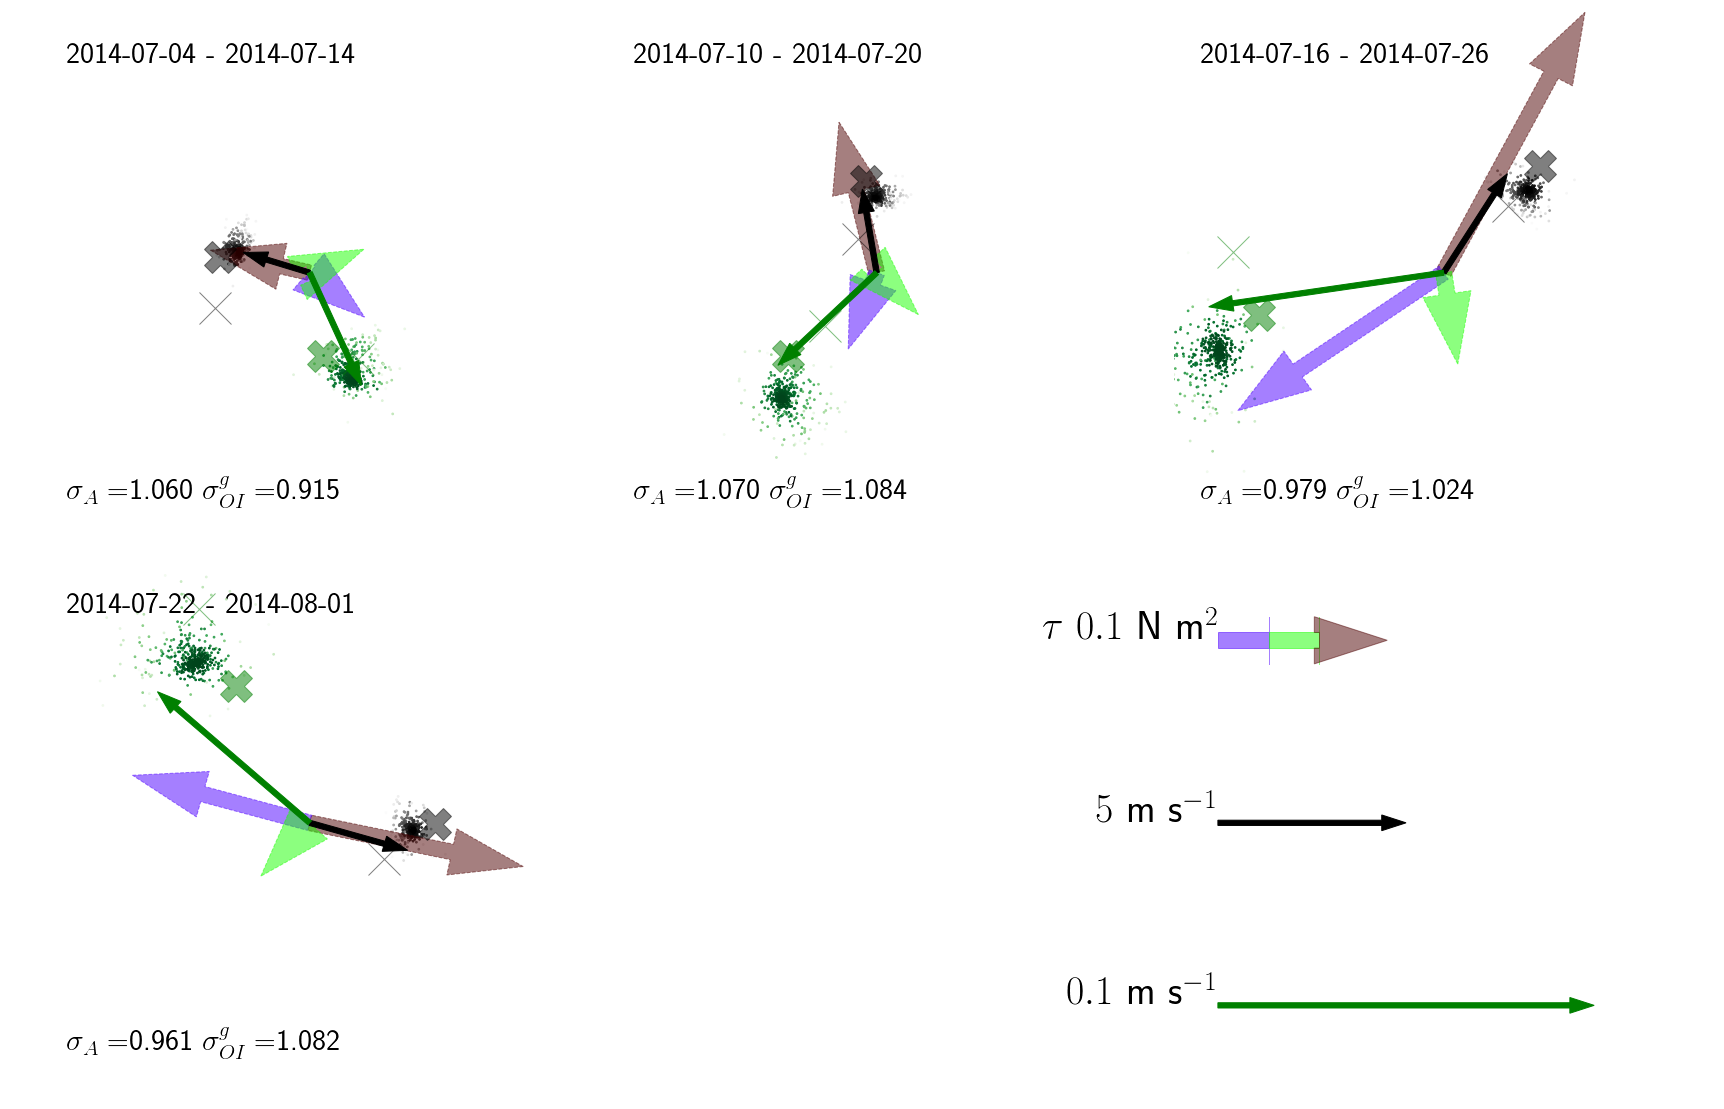

In [227]:
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-31/'
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# GEO GEO CASE - NO BLUE
# WIND BLACK, GEO GREEN
# want arrows for the obs and best, scatter all the rest with mymap
# put in a single force arrow for the best too
# dd = 100
day_start = inv_list_d[dd,1]
nbals_use = inv_list_d[dd,0]
wnd_range = 1.4*np.max(data_mean_single[day_start:inv_list_d[dd,nbals_use]+1,4])
# wnd_range = 0.99*np.max(np.maximum(all_vecs[vec_plot,0:nbals_use,0:2],wnd_range))
wnd_scale = 0.01
force_scale = 0.45
# weight = 0.006
weight = 0.02*wnd_range*wnd_scale
#     print('Inverting day ',day_start,', no ',dd,' of ',list_d)
# wnd_range = np.max(wind_mag)
# wnd_range = 0.99*np.max(np.maximum(all_vecs[-1,:,0:2],wnd_range))
# wnd_scale = 0.04
f = plt.figure(figsize=[30,40])
plt.rc('text', usetex=True)
for nb in range(nbals_use):
# for nb in range(0,1):
    ax = plt.subplot(4,3,nb+1)
#     #   calculated vectors
    # wind
    plt.scatter(wnd_scale*all_vecs[0:vec_plot,nb,0],wnd_scale*all_vecs[0:vec_plot,nb,1],
                c=np.log(all_vecs[0:vec_plot,nb,4]),s=3,cmap='Greys_r')
    plt.scatter(all_vecs[0:vec_plot,nb,2],all_vecs[0:vec_plot,nb,3],
                c=np.log(all_vecs[0:vec_plot,nb,4]),s=3,cmap='Greens_r')
    plt.clim(np.log([misfit_min,misfit_cut*1e0]))
    plt.plot(wnd_scale*all_vecsA[nb,0],wnd_scale*all_vecsA[nb,1],
                'Xk',markersize=32,alpha=0.5)
    plt.plot(all_vecsA[nb,2],all_vecsA[nb,3],
                'Xg',markersize=32,alpha=0.5)
    plt.plot(wnd_scale*all_vecsB[nb,0],wnd_scale*all_vecsB[nb,1],
                'xk',markersize=32,alpha=0.5)
    plt.plot(all_vecsB[nb,2],all_vecsB[nb,3],
                'xg',markersize=32,alpha=0.5)
    # force vectors
    if nb in [0,1,2,3,4]:
        plt.arrow(0.0,0.0,all_forces[nb,0]/force_scale,all_forces[nb,1]/force_scale,
    #     plt.arrow(0.0,0.0,all_forces0[nb,0]/force_scale,all_forces0[nb,1]/force_scale,
                   length_includes_head = 'true',linestyle='dashed',color=[0.3,0,0],alpha = 0.5,width=weight*3)
    #     force_scale = np.hypot(all_forces[nb,2],all_forces[nb,3])/wnd_range/wnd_scale*2
        plt.arrow(0.0,0.0,all_forces[nb,2]/force_scale,all_forces[nb,3]/force_scale,
                   length_includes_head = 'true',linestyle='dashed',color=[0.3,0,1],alpha = 0.5,width=weight*3)
    #     force_scale = np.hypot(all_forces[nb,4],all_forces[nb,5])/wnd_range/wnd_scale*2
        plt.arrow(0.0,0.0,all_forces[nb,4]/force_scale,all_forces[nb,5]/force_scale,
                   length_includes_head = 'true',linestyle='dashed',color=[0.1,1,0],alpha = 0.5,width=weight*3)
# #     # force vectors ZEROED TO WIND
# #     force_scale = np.hypot(all_forces[nb,0],all_forces[nb,1])/wnd_range/wnd_scale*2
#     plt.arrow(0.0,0.0,all_forces0[nb,0]/force_scale,all_forces0[nb,1]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.5,width=weight*2)
# #     force_scale = np.hypot(all_forces[nb,2],all_forces[nb,3])/wnd_range/wnd_scale*2
#     plt.arrow(0.0,0.0,all_forces0[nb,2]/force_scale,all_forces0[nb,3]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.5,width=weight*2)
# #     force_scale = np.hypot(all_forces[nb,4],all_forces[nb,5])/wnd_range/wnd_scale*2
#     plt.arrow(0.0,0.0,all_forces0[nb,4]/force_scale,all_forces0[nb,5]/force_scale,
#                length_includes_head = 'true',linestyle='dashed',color='g',alpha = 0.5,width=weight*2)
    # best vectors
#     plt.arrow(0.0,0.0,wnd_scale*all_vecs[vec_plot,nb,0],wnd_scale*all_vecs[vec_plot,nb,1],
#                length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.7,width=weight/2)
#     plt.arrow(0.0,0.0,all_vecs[vec_plot,nb,2],all_vecs[vec_plot,nb,3],
#                length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.7,width=weight/2)
#     plt.arrow(0.0,0.0,all_vecs[vec_plot,nb,4],all_vecs[vec_plot,nb,5],
#                length_includes_head = 'true',linestyle='dashed',color='g',alpha = 0.7,width=weight/2)
#     plt.scatter(wnd_scale*all_vecs[0:vec_plot,nb,0],wnd_scale*all_vecs[0:vec_plot,nb,1],
#                 c=np.log(all_vecs[0:vec_plot,nb,4]),s=3,cmap=mymap)
#     plt.scatter(-all_vecs[0:vec_plot,nb,2],-all_vecs[0:vec_plot,nb,3],
#                 c=np.log(all_vecs[0:vec_plot,nb,4]),s=3,cmap=mymap)
#     plt.clim(np.log([misfit_min,misfit_cut]))
#     # best vectors
#     plt.arrow(0.0,0.0,wnd_scale*all_vecs[vec_plot,nb,0],wnd_scale*all_vecs[vec_plot,nb,1],
#                length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.7)
#     plt.arrow(0.0,0.0,-all_vecs[vec_plot,nb,2],-all_vecs[vec_plot,nb,3],
#                length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.7)
# #     #   original vectors
#     plt.arrow(0,0,wnd_scale*data_mean_single[day_start+nb,2],wnd_scale*data_mean_single[day_start+nb,3],
#               color='k',length_includes_head = 'true',width=weight)
#     plt.arrow(0,0,data_mean_big[day_start+nb,0,d_w],data_mean_big[day_start+nb,1,d_w],
#               color='b',length_includes_head = 'true',width=weight)
    plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
    plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
    jj = inv_list_d[dd,nb+1]
#     plt.arrow(0,0,wnd_scale*data_mean_single[jj,2],wnd_scale*data_mean_single[jj,3],
#               color='k',length_includes_head = 'true',width=weight)
#     plt.arrow(0,0,data_mean_5[jj,2],data_mean_5[jj,3],
#               color='b',length_includes_head = 'true',width=weight)
#     plt.arrow(0,0,data_mean_big[jj,0,d_w],data_mean_big[jj,1,d_w],
#               color='b',length_includes_head = 'true',width=weight)
#     for i in range(data_ranges[jj,2],data_ranges[jj,3]):
# #         val[2] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
# #         val[3] =  np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
# #         val[2] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
# #         val[3] = -np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
# # #       # third attempt, from looking at the aws mat file
# # #       bearing is angle from west, clockwise, to where the wind is going
# # #       or from east, anticlockwise, to where the wind is from
#         val[2] = -np.cos(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         val[3] =  np.sin(np.deg2rad(aws_02_data[i][12]))*aws_02_data[i][11]
#         plt.arrow(0,0,wnd_scale*val[2],wnd_scale*val[3],alpha=0.2,color='k')
#     if (data_ranges[jj,6] < data_ranges[jj,7]):
#         geo_s = (data_ranges[jj,7]-data_ranges[jj,6]+1)/(data_ranges[jj,1]-data_ranges[jj,0]+1) 
#         for i in range(data_ranges[jj,0],data_ranges[jj,1]):
#             for d in range(-2,1):
#                 geo_p = data_ranges[jj,6] + int((i - data_ranges[jj,0])*geo_s) 
#                 val[0] = refdepth[0,geo_p+d]
#                 val[1] = u[val[0],i]
#                 val[2] = v[val[0],i]
#                 plt.arrow(0,0,val[1],val[2],alpha=0.2,color='g')
#     plt.arrow(0,0,wnd_scale*data_mean_single[jj,2],wnd_scale*data_mean_single[jj,3],
#               color='k',length_includes_head = 'true',width=weight)
#     plt.arrow(0,0,data_mean_geo[jj,1],data_mean_geo[jj,2],
#               color='g',length_includes_head = 'true',width=weight)
    plt.arrow(0,0,wnd_scale*ERA_U_mean[jj,0],wnd_scale*ERA_U_mean[jj,1],
              color='k',length_includes_head = 'true',width=weight)
    plt.arrow(0,0,SATOI_mean[jj,0],SATOI_mean[jj,1],
              color='g',length_includes_head = 'true',width=weight)
#     plt.arrow(0,0,wnd_scale*ERA_U[jj,0],wnd_scale*ERA_U[jj,1],
#               color='k',length_includes_head = 'true',width=weight)
#     plt.arrow(0,0,GEO_W[jj,0] - DRIFT[jj,0],GEO_W[jj,1] - DRIFT[jj,1],
#               color='g',length_includes_head = 'true',width=weight)
# #     plt.arrow(-wnd_scale/2,-wind_mag[nb]*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wind_mag[nb]*wnd_scale/4,wnd_scale,0,
# # #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-wnd_range*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wnd_range*wnd_scale/4,wnd_scale,0,
# #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.text(wnd_scale,-wind_mag[nb]*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
# #     plt.text(wnd_scale,-3*wind_mag[nb]*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-wnd_range*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-3*wnd_range*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
    plt.text(-0.9*wnd_range*wnd_scale,0.8*wnd_range*wnd_scale,
#             "Sig A "+str(data_std_single[ day_start+nb,7]/data_mean_single[day_start+nb,4]))
            (d150_tstart[d150_start]+datetime.timedelta(days=int(1+jj*day_strd))).strftime('%Y-%m-%d')+' - '+
            (d150_tstart[d150_start]+datetime.timedelta(days=int(1+n_days+jj*day_strd))).strftime('%Y-%m-%d'),fontsize=30)
    plt.text(-0.9*wnd_range*wnd_scale,-0.9*wnd_range*wnd_scale,
            r"$\sigma_A = $"+'{0:.{1}f}'.format(data_std_single[jj,7]/data_mean_single[jj,4], 3)
#             +r" $\sigma_{OI} = $"+'{0:.{1}f}'.format(data_std_5[jj,3]/data_mean_5[jj,4], 3)
            +r" $\sigma^g_{OI} = $"+'{0:.{1}f}'.format(data_std_geo[jj,3]/data_mean_geo[jj,3], 3),fontsize=30)
    ax.axis('off')
ax = plt.subplot(4,3,6)
# wnd_range = wnd_range/2
plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
# §
plt.arrow(-0.06,0.05,force_scale*0.03,0,head_length = 0,
              alpha=0.5,color=[0.3,0,1],width = weight*3,length_includes_head = 'true',)
plt.arrow(-0.06+force_scale*0.03,0.05,force_scale*0.03,0,head_length = 0,
              alpha=0.5,color=[0.1,1,0],width = weight*3,length_includes_head = 'true',)
plt.arrow(-0.06+force_scale*0.06,0.05,force_scale*0.04,0,
              alpha=0.5,color=[0.3,0,0],width = weight*3,length_includes_head = 'true')
plt.text(-0.06,0.05,
            r'$\tau$  $0.1$ N m$^2$',fontsize=40,horizontalalignment='right')
plt.arrow(-0.06,0,5*wnd_scale,0,
              color='k',width = weight,length_includes_head = 'true')
plt.text(-0.06,0,
             r'$5$ m s$^{-1}$',fontsize=40,horizontalalignment='right')
plt.arrow(-0.06,-0.05,0.1,0,
              color='g',width = weight,length_includes_head = 'true')
plt.text(-0.06,-0.05,
             r'$0.1$ m s$^{-1}$',fontsize=40,horizontalalignment='right')
ax.axis('off')
plt.subplots_adjust(hspace=0.05,wspace=0.05)    
f.savefig(fig_location+'vec_fit+forces_geo_geo_10d_SAT.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [127]:
[-wnd_range*wnd_scale,wnd_range*wnd_scale]

[-0.071759858333333371, 0.071759858333333371]

In [175]:
# disassemble forces
# forcing_1
all_forces = np.empty([data_NA['number'][-1],nbals,6])
# for j in tqdm(data_NA['number']-1):
# for j in range(data_NA['number'][-1]-10,data_NA['number'][-1]-1):
# for j in tqdm(data_NA['number']-1):
for j in range(misfit_min_no,misfit_min_no+1):
    for i in range(0,5):
        all_forces[j,i,:] = freedrift.force_bal(
                          data_mean_single[day_start+nb,2],data_mean_single[day_start+nb,3],
                          data_mean_big[day_start+nb,0,d_w],data_mean_big[day_start+nb,1,d_w],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*data_in[1+11*nbals+i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
force_magw = np.empty([nbals])
for i in range(nbals):
    force_magw[i] = np.max(np.hypot(all_forces[misfit_min_no,i,0],all_forces[misfit_min_no,i,1]))

IndexError: index 111 is out of bounds for axis 0 with size 13

In [174]:
# disassemble misfits
vec_strd = 10
all_misfits = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd),nbals,4])
# for j in tqdm(data_NA['number']-1):
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
    for ii in range(nbals):
        i = bal_p[ii]
        all_misfits[jj,i,0] = freedrift.misfit_a_io(
                          data_mean_single[day_start+i,2],data_mean_single[day_start+i,3],
                          -data_mean_big[day_start+i,0,d_w],-data_mean_big[day_start+i,1,d_w],
                          data_NA['Na'][j],data_NA['Ro'][j]*data_in[1+11*nbals+i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_a[i]/data_in[1+3*nbals+i]**2
        all_misfits[jj,i,1] = freedrift.misfit_i_o(
                          data_mean_single[day_start+i,2],data_mean_single[day_start+i,3],
                          -data_mean_big[day_start+i,0,d_w],-data_mean_big[day_start+i,1,d_w],
                          data_NA['Na'][j],data_NA['Ro'][j]*data_in[1+11*nbals+i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_i[i]/data_in[1+7*nbals+i]**2
        fb_ratio = np.mean([data_in[1+3*nbals+i]/data_in[1+2*nbals+i],
                     data_in[1+7*nbals+i]/data_in[1+6*nbals+i]]) 
        all_misfits[jj,i,2] = freedrift.misfit_fb2(
                          data_mean_single[day_start+i,2],data_mean_single[day_start+i,3],
                          -data_mean_big[day_start+i,0,d_w],-data_mean_big[day_start+i,1,d_w],
                          data_NA['Na'][j]/data_NA['Ro'][j]/rhoi,
                          rhoi/data_NA['Ro'][j],rhoi*data_in[1+11*nbals+i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_fb[i]/fb_ratio**2
        all_misfits[jj,i,3] = data_NA['misfit'][j]
    jj += 1

IndexError: index 111 is out of bounds for axis 0 with size 13

In [ ]:
plt.figure(figsize=[30,10])
# cmin = 1e-10
cmin = misfit_min*1e-9
# cmin = 1e-4
cmax = misfit_max*1e3
# cmin = 1e-12
for i in range(nbals):
    plt.subplot(1,nbals,i+1)
# for i in range(0,3):
#     plt.subplot(1,3,i+1)
    plt.plot(all_misfits[:,i,0],alpha = 1.0,c='k')
    plt.plot(np.sum(all_misfits[:,i,0:3],axis=1),c='k',alpha=0.5)
    plt.plot(all_misfits[:,i,1],alpha = 1.0,c='r')
    plt.plot(all_misfits[:,i,2],alpha = 1.0,c='b')
    plt.plot(all_misfits[:,i,3],'xg')
    plt.yscale('log')
    plt.ylim([cmin,cmax])
plt.show()

plt.plot(np.sum(all_misfits[:,:,0],axis=1),c='k')
plt.plot(np.sum(all_misfits[:,:,1],axis=1),c='r')
plt.plot(np.sum(all_misfits[:,:,2],axis=1),c='b')
plt.plot(all_misfits[:,0,3],'xg')
plt.plot(np.sum(np.sum(all_misfits[:,:,0:3],axis=2),axis=1),c='k',alpha=0.5)
plt.ylim([cmin,cmax])
plt.yscale('log')
# plt.savefig('misfit_sep_100%.pdf')
plt.show()

In [43]:
## fig_location = '/Users/H/Documents/Tex/Reports/18-06-12/'
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
# colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
# colors = np.vstack((colors1, colors2))
colors = np.vstack((colors1,1-(1-colors2)*0.5))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.xticks([])
plt.yticks([])
plt.show()

# plot misfit
# cmin = 1e-10
# cmax = 1e2
plt.figure(figsize=[10,10])
plt.subplot(5,1,1)
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,np.max(data_NA['misfit'])])
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')

plt.subplot(5,1,2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
# plt.savefig('misfit_all_100%.pdf')
plt.subplot(5,1,3)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
# plt.subplot(5,1,4)
# plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
# plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
# plt.xlim([0,data_NA['number'][-1]])
# plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
# plt.clim(np.log([cmin,cmax]))
# plt.ylabel(r'$\theta_{AW}$')
plt.subplot(5,1,5)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{W}$')
plt.xlabel('Model Number')
plt.show()

# plot trade off
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
f = plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])
# horizontal hists
plt.subplot(4,4,1)
plt.hist(data_NA['Ro'],bins=100,color='k',orientation='horizontal')
plt.axhline(inv_data_d[day_start-first_day,10],color='g')
plt.axhline(inv_data_d[day_start-first_day,11],color='g')
plt.axhline(inv_data_d[day_start-first_day,12],color='g')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(data_NA['thO'],bins=100,color='k',orientation='horizontal')
plt.axhline(inv_data_d[day_start-first_day,13],color='g')
plt.axhline(inv_data_d[day_start-first_day,14],color='g')
plt.axhline(inv_data_d[day_start-first_day,15],color='g')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{W}$')
# plt.subplot(4,4,9)
# plt.hist(data_NA['thA-O'],bins=100,color='k',orientation='horizontal')
# plt.axhline(inv_data_d[day_start-first_day,16],color='g')
# plt.axhline(inv_data_d[day_start-first_day,17],color='g')
# plt.axhline(inv_data_d[day_start-first_day,18],color='g')
# plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
# plt.xscale('log')
# plt.xlim([1e1,1e4])
# plt.ylabel(r'$\theta_{AW}$')
# x - Na y - Ro
plt.subplot(4,4,2)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('Ro')
# plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--k')
# plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
# x - Na y - thA
plt.subplot(4,4,6)
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thO')
# plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
# plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Ro y - thA
plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
# plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Na y - thO
# plt.subplot(4,4,10)
# plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
# plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
# plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
# plt.clim(np.log([cmin,cmax]))
# # plt.ylabel('thA-O')
# # plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
# plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - Ro y - thO
# plt.subplot(4,4,11)
# plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
# plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
# plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
# plt.clim(np.log([cmin,cmax]))
# # plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
# plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# # x - thA y - thO
# plt.subplot(4,4,12)
# plt.scatter(data_NA['thO'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
# plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
# plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
# plt.clim(np.log([cmin,cmax]))
# # plt.plot([np.min(data_NA['thO']),np.max(data_NA['thO'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
# plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# bottom row histograms
plt.subplot(4,4,14)
plt.hist(data_NA['Na'],bins=100,color='k')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.axvline(inv_data_d[day_start-first_day,7],color='g')
plt.axvline(inv_data_d[day_start-first_day,8],color='g')
plt.axvline(inv_data_d[day_start-first_day,9],color='g')
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(data_NA['Ro'],bins=100,color='k')
plt.axvline(inv_data_d[day_start-first_day,10],color='g')
plt.axvline(inv_data_d[day_start-first_day,11],color='g')
plt.axvline(inv_data_d[day_start-first_day,12],color='g')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel('Ro\'')
plt.subplot(4,4,16)
plt.hist(data_NA['thO'],bins=100,color='k')
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.axvline(inv_data_d[day_start-first_day,13],color='g')
plt.axvline(inv_data_d[day_start-first_day,14],color='g')
plt.axvline(inv_data_d[day_start-first_day,15],color='g')
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'$\theta_{W}$')
# f.savefig(fig_location+'trade_off_d5_geo_thAC.pdf',format='pdf',bbox__inches='tight')
plt.show()

NameError: name 'misfit_max' is not defined

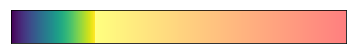

In [52]:

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
# plot trade off
# fig_location = '/Users/H/Documents/Tex/Reports/18-07-31/'
# big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
big_c = np.int(128*3)
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
# colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
# colors = np.vstack((colors1, colors2))
colors = np.vstack((colors1,1-(1-colors2)*0.5))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.xticks([])
plt.yticks([])
plt.show()
# Na_min = np.min(data_NA['Na'])
# Na_max = np.max(data_NA['Na'])
# Ro_min = np.min(data_NA['Ro'])
# Ro_max = np.max(data_NA['Ro'])
# thO_min = np.min(data_NA['thO'])
# thO_max = np.max(data_NA['thO'])
# thAO_min = np.min(data_NA['thA-O'])
# thAO_max = np.max(data_NA['thA-O'])
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
def trade_off_now(data_NA,Na_min,Na_max,Ro_min,Ro_max,thO_min,thO_max,thAO_min,thAO_max):
    fig = plt.figure(figsize=[10,10])
    cmin = np.min(data_NA['misfit'])
    # cmin = 1e-4
    cmax = np.max(data_NA['misfit'])*0.5
    # cmax = 1e7
    # cmin = np.min(data_NA['misfit'])
    # cmin = 1e-4
    # cmax = np.max(data_NA['misfit'])
    # horizontal hists


    # x - Na y - Ro
    plt.subplot(3,3,1)
    plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
    plt.xlim([Na_min,Na_max])
    plt.ylim([Ro_min,Ro_max])
    plt.clim(np.log([cmin,cmax]))
    plt.ylabel('Ro\'')
    # plt.ylabel('Ro')
    # plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--k')
    # plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--k')
    plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
    plt.xticks([])
    # plt.yticks([])
    # x - Na y - thA
    plt.subplot(3,3,4)
    plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
    plt.xlim([Na_min,Na_max])
    plt.clim(np.log([cmin,cmax]))
    plt.ylabel(r'$\theta_{A}$')
    # plt.ylabel('thO')
    # plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
    # plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
    plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
    plt.xticks([])
    plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],
               [r'$-\pi$',r'$-\pi/2$',0,r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
    plt.ylim([thO_min,thO_max])
    # x - Ro y - thA
    plt.subplot(3,3,5)
    plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
    plt.xlim([Ro_min,Ro_max])
    plt.ylim([thO_min,thO_max])
    plt.clim(np.log([cmin,cmax]))
    # plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
    # plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
    plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
    plt.xticks([])
    plt.yticks([])
    # x - Na y - thO
    plt.subplot(3,3,7)
    plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
    plt.xlim([Na_min,Na_max])
    plt.ylim([thAO_min,thAO_max])
    plt.clim(np.log([cmin,cmax]))
    plt.xlabel(r'Na$^2$')
    plt.ylabel(r'$\theta_{OA}$')
    # plt.ylabel('thA-O')
    # plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
    # plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
    plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
    plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[r'$-\pi$',r'$-\pi/2$',0,r'$\pi/2$',r'$\pi$'])
    # plt.xticks([])
    # plt.yticks([])
    # x - Ro y - thO
    plt.subplot(3,3,8)
    plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
    plt.xlim([Ro_min,Ro_max])
    plt.ylim([thAO_min,thAO_max])
    plt.clim(np.log([cmin,cmax]))
    plt.xlabel('Ro\'')
    # plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
    # plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
    plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
    # plt.xticks([])
    plt.yticks([])
    # x - thA y - thO
    plt.subplot(3,3,9)
    plt.scatter(data_NA['thO'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
    plt.xlim([thO_min,thO_max])
    plt.ylim([thAO_min,thAO_max])
    plt.clim(np.log([cmin,cmax]))
    plt.xlabel(r'$\theta_{A}$')
    # plt.plot([np.min(data_NA['thO']),np.max(data_NA['thO'])],[i*th2 for i in [1,1]],'--k')
    # plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
    plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
    # plt.xticks([])
    plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],
               [r'$-\pi$',r'$-\pi/2$',0,r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
    plt.yticks([])
    plt.xlim([thO_min,thO_max])
    # bottom row histograms
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close()
    return image
    

In [55]:
# NOW ADDED EXTRA TO ANIMATE IT
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
fig_location = '/Users/H/INVERSE/Sylvia_data/Animations/'
# this needs to be a def: that takes a point and returns a plot.


# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo/'
na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo_O-A/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo_thAC/'
# these replace for thO
# thO_min = np.deg2rad(-5)
# thO_max = np.deg2rad( 5)
thO_min = np.deg2rad( 0)
thO_max = np.deg2rad( 359)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 180)
# thAO_min = np.deg2rad(18)
# thAO_max = np.deg2rad(28)
# for dd in range(0,list_d-nbals):
# for dd in range(0,invs_to_do):
# for dd in range(6,7):
# for dd in range(23,24):
images = []
for dd in range(0,invs_to_do):
# for dd in range(26,28):
#     day_start = bal_all[dd]
    day_start = inv_list_d[dd,1]
#     print('Inverting day ',day_start,', no ',dd,' of ',list_d)
    nbals_use = inv_list_d[dd,0]
    print('Inverting day ',day_start,', no ',dd + 1,' of ',invs_to_do,' nbals = ',nbals_use)

# will now filter the data before processing ot get the exact number of records to do
    # load up the data
    data_in = np.ndarray([nbals_use*17+12],dtype='float32')
    
    Na2_scale = 0.015**2
    beta_a = np.ndarray([nbals_use])
    beta_i = np.ndarray([nbals_use])
    beta_g = np.ndarray([nbals_use])
    beta_fb= np.ndarray([nbals_use])
    # for j in range(nbals_use):
    #     i = bal_p[j]
    #     beta_a[j] = 0.0/Bbeta_a # 1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
    #     beta_i[j] = 0.0/Bbeta_i # 1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
    #     beta_fb[j]= 1.0/Bbeta_fb# 1.0 #  data_mean_single[day_start+day+i,4]**-4
    for j in range(nbals_use):
        i = bal_p[j]
        beta_a[j] =  1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
        beta_i[j] =  1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
        beta_g[j] =  0.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
        beta_fb[j]=  1.0 #  data
    r = 0;
    data_in[0] = nbals_use;
#     inv_list_d[dd,0]=nbals_use
    for j in range(nbals_use):
#         i = bal_p[j]
#         i = bal_all[dd+j]-day_start
#         inv_list_d[dd,1+j] = day_start + i
        i = inv_list_d[dd,j+1] - day_start
        # wind data
        data_in[1+0*nbals_use+j] = data_mean_single[day_start+i,2] # uwind
        data_in[1+1*nbals_use+j] = data_mean_single[day_start+i,3] # vwind
        data_in[1+2*nbals_use+j] = data_mean_single[day_start+i,4] # mag
        data_in[1+3*nbals_use+j] = data_std_single[ day_start+i,7] # sig
        # i_o data
        data_in[1+4*nbals_use+j] = data_mean_5[day_start+i,2] # uice
        data_in[1+5*nbals_use+j] = data_mean_5[day_start+i,3] # vice
        data_in[1+6*nbals_use+j] = data_mean_5[day_start+i,4] # mag
        data_in[1+7*nbals_use+j] = data_std_5[ day_start+i,3] # sig
        # i_o data geo
#         data_in[1+8*nbals_use+j] = data_mean_geo[day_start+i,10] # ugeo smooth
#         data_in[1+9*nbals_use+j] = data_mean_geo[day_start+i,11] # vgeo smooth
#         data_in[1+8*nbals_use+j] = -geo_temp[day_start+i,0] # -uice
#         data_in[1+9*nbals_use+j] = -geo_temp[day_start+i,1] # -uice
#         data_in[1+8*nbals_use+j] = GEO_W[day_start+i,0]-geo_temp[day_start+i,0] # CRYoSAT-uice
#         data_in[1+9*nbals_use+j] = GEO_W[day_start+i,1]-geo_temp[day_start+i,1] # CRYoSAT-uice
        data_in[1+8*nbals_use+j] = data_mean_geo[day_start+i,1] # ugeo
        data_in[1+9*nbals_use+j] = data_mean_geo[day_start+i,2] # vgeo
        data_in[1+10*nbals_use+j] = data_mean_geo[day_start+i,3] # mag
        data_in[1+11*nbals_use+j] = data_std_geo[ day_start+i,3] # sig
    #     data_in[1+7*nbals_use+i] = data_mean_big[ day_start+i,5,d_w] # sig
       # scale data
        data_in[1+12*nbals_use+j] = beta_a[j] ;r+=nbals_use # beta scalings - see above
        data_in[1+13*nbals_use+j] = beta_i[j] ;r+=nbals_use
        data_in[1+14*nbals_use+j] = beta_g[j] ;r+=nbals_use
        data_in[1+15*nbals_use+j] = beta_fb[j];r+=nbals_use
        data_in[1+16*nbals_use+j] = (data_mean_single[day_start+i,7]*
                                 data_mean_single[day_start+i,8]) # hifc   
#                                  data_mean_single[day_start+i,8]*NSIDC[day_start+i,0]) # hifc*conc
    r = 1 + 17 * nbals_use
    # other data/constants
    data_in[r] = rhoa ;r+=1
    data_in[r] = rhoi ;r+=1
    data_in[r] = rhoo ;r+=1
#     data_in[r] = thAC ;r+=1
    # special for range
    data_in[r] = n2a_min;r+=1
    data_in[r] = n2a_max;r+=1
    data_in[r] = rop_min;r+=1
    data_in[r] = rop_max;r+=1
    data_in[r] = thO_min;r+=1
    data_in[r] = thO_max;r+=1
    data_in[r] = thAO_min;r+=1
    data_in[r] = thAO_max;r+=1
    f = open(na_location+'/freedrift_IC','wb')
    data_in.tofile(f,sep=' ')
    f.close()
    
    #!!!! RUN THE NA !!!!
#     ! NA_setup/NA_run_i_o_w_a/bin/freedrift_na
#     ! NA_setup/NA_run_i_o_w_a/nad2asc na.nad na.asc
#     ! NA_setup/NA_run_i_o_w_a_thAC/bin/freedrift_na
#     ! NA_setup/NA_run_i_o_w_a_thAC/nad2asc na.nad na.asc
    if (nbals_use>2):
#         ! nohup NA_setup/NA_geo/bin/freedrift_na 
#         ! nohup NA_setup/NA_geo/nad2asc na.nad na.asc
        ! nohup NA_setup/NA_geo_O-A/bin/freedrift_na 
        ! nohup NA_setup/NA_geo_O-A/nad2asc na.nad na.asc
#     ! nohup NA_setup/NA_geo_thAC/bin/freedrift_na
#     ! NA_setup/NA_geo_thAC/nad2asc na.nad na.asc
    # # read output
        data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                     names=['number','Na','Ro','thO','thA-O','misfit'])
#     data_NA = ascii.read(location+'/na.asc',guess=False,header_start=13,data_start=13,
#                      names=['number','Na','Ro','thO','misfit'])
        misfit_filter = 1e7
        misfit_min = data_NA['misfit'][0]
        misfit_ratio = 0.25
        misfit_max = 0.0
        misfit_min_no = 0
        for i in data_NA['number'][0:-1]:
            if data_NA['misfit'][i] < misfit_min:
                misfit_min = data_NA['misfit'][i]
                misfit_min_no = i
            if (data_NA['misfit'][i] > misfit_max and data_NA['misfit'][i] < misfit_filter):
                misfit_max = data_NA['misfit'][i]
        misfit_range = misfit_max/misfit_min

        misfit_cut = misfit_min**(1.0 - misfit_ratio)*misfit_max**misfit_ratio
        # number_cut = int(3*data_NA['number'][-1]/4)
        number_cut = it1
        data_NA_cut = np.empty([6,data_NA['number'][-1]])
    
        images.append(
             trade_off_now(data_NA,n2a_min,n2a_max,rop_min,rop_max,thO_min,thO_max,thAO_min,thAO_max)
                    )
        
imageio.mimsave(fig_location+'trade_offs_d5_geo_10day.gif', images, fps=2)


Inverting day  90 , no  1  of  96  nbals =  2
Inverting day  91 , no  2  of  96  nbals =  2
Inverting day  92 , no  3  of  96  nbals =  2
Inverting day  88 , no  4  of  96  nbals =  3
appending output to nohup.out
appending output to nohup.out
Inverting day  84 , no  5  of  96  nbals =  4
appending output to nohup.out
appending output to nohup.out
Inverting day  90 , no  6  of  96  nbals =  3
appending output to nohup.out
appending output to nohup.out
Inverting day  91 , no  7  of  96  nbals =  3
appending output to nohup.out
appending output to nohup.out
Inverting day  92 , no  8  of  96  nbals =  3
appending output to nohup.out
appending output to nohup.out
Inverting day  88 , no  9  of  96  nbals =  4
appending output to nohup.out
appending output to nohup.out
Inverting day  84 , no  10  of  96  nbals =  5
appending output to nohup.out
appending output to nohup.out
Inverting day  90 , no  11  of  96  nbals =  4
appending output to nohup.out
appending output to nohup.out
Inverting da

In [54]:
# invert for thO and thA-thO
# these replace for thO
# thO_min = np.deg2rad(-10)
# thO_max = np.deg2rad( 10)
# thO_min = np.deg2rad(0)
# thO_max = np.deg2rad( 359)
thO_min = np.deg2rad(-179)
thO_max = np.deg2rad( 180)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 180)

# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_run_i_o_w_a/'
na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_i_o_O-A/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_run_i_o_w_a_thAC/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo_thAC/'
images = []
# for dd in range(0,list_d-nbals):
for dd in range(0,invs_to_do):
# for dd in range(6,7):
# for dd in range(23,24):
# for dd in range(46,47):
# for dd in range(5,6):
# for dd in range(77,78):
#     day_start = bal_all[dd]
    day_start = inv_list_d[dd,1]
    nbals_use = inv_list_d[dd,0]
#     print('Inverting day ',day_start,', no ',dd,' of ',list_d)
    print('Inverting day ',day_start,', no ',dd + 1,' of ',invs_to_do,' nbals = ',nbals_use)

# will now filter the data before processing ot get the exact number of records to do
    # load up the data
    data_in = np.ndarray([nbals_use*12+13],dtype='float32')
    
    Na2_scale = 0.015**2
    beta_a = np.ndarray([nbals_use])
    beta_i = np.ndarray([nbals_use])
    beta_w = np.ndarray([nbals_use])
    beta_fb= np.ndarray([nbals_use])
    # for j in range(nbals_use):
    #     i = bal_p[j]
    #     beta_a[j] = 0.0/Bbeta_a # 1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
    #     beta_i[j] = 0.0/Bbeta_i # 1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
    #     beta_fb[j]= 1.0/Bbeta_fb# 1.0 #  data_mean_single[day_start+day+i,4]**-4
    for j in range(nbals_use):
        i = bal_p[j]
        beta_a[j] =  1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
        beta_i[j] =  1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
        beta_fb[j]=  1.0 #  data
    r = 0;
    data_in[0] = nbals_use;
#     inv_list_d[dd,0]=nbals_use
    for j in range(nbals_use):
#         i = bal_p[j]
#         i = bal_all[dd+j]-day_start
#         inv_list_d[dd,1+j] = day_start + i
        i = inv_list_d[dd,j+1] - day_start
        # wind data
#         data_in[1+0*nbals_use+j] = data_mean_single[day_start+i,2] # uwind
#         data_in[1+1*nbals_use+j] = data_mean_single[day_start+i,3] # vwind
#         data_in[1+2*nbals_use+j] = data_mean_single[day_start+i,4] # mag
#         data_in[1+3*nbals_use+j] = data_std_single[ day_start+i,7] # sig
        
#         data_in[1+0*nbals_use+j] = ERA_U[day_start+i,0] # uwind
#         data_in[1+1*nbals_use+j] = ERA_U[day_start+i,1] # vwind
#         data_in[1+2*nbals_use+j] = ERA_U[day_start+i,2] # mag
#         data_in[1+3*nbals_use+j] = ERA_U[day_start+i,4] # sig
        data_in[1+0*nbals_use+j] = ERA_U_mean[day_start+i,0] # uwind
        data_in[1+1*nbals_use+j] = ERA_U_mean[day_start+i,1] # vwind
        data_in[1+2*nbals_use+j] = ERA_U_mean[day_start+i,2] # mag
        data_in[1+3*nbals_use+j] = ERA_U_mean[day_start+i,3] # sig
        # #i_o data
#         data_in[1+4*nbals_use+j] = data_mean_5[day_start+i,2] # uice
#         data_in[1+5*nbals_use+j] = data_mean_5[day_start+i,3] # vice
#         data_in[1+6*nbals_use+j] = data_mean_5[day_start+i,4] # mag
#         data_in[1+7*nbals_use+j] = data_std_5[ day_start+i,3] # sig
        # i_o data geo
#         data_in[1+8*nbals_use+j] = data_mean_geo[day_start+i,10] # uice
#         data_in[1+9*nbals_use+j] = data_mean_geo[day_start+i,11] # vice
#         data_in[1+4*nbals_use+j] = data_mean_geo[day_start+i,1] # uice
#         data_in[1+5*nbals_use+j] = data_mean_geo[day_start+i,2] # vice
#         data_in[1+6*nbals_use+j] = data_mean_geo[day_start+i,3] # mag
#         data_in[1+7*nbals_use+j] = data_std_geo[ day_start+i,3] # sig
        
#         data_in[1+4*nbals_use+j] = GEO_W[day_start+i,0] - DRIFT[day_start+i,0] # uwind
#         data_in[1+5*nbals_use+j] = GEO_W[day_start+i,1] - DRIFT[day_start+i,1] # vwind
#         data_in[1+6*nbals_use+j] = np.hypot(data_in[1+0*nbals_use+j] , data_in[1+1*nbals_use+j]) # mag
#         data_in[1+7*nbals_use+j] = np.hypot(GEO_W[day_start+i,4] , DRIFT[day_start+i,4]) # sig
    #     data_in[1+7*nbals_use+i] = data_mean_big[ day_start+i,5,d_w] # sig
        data_in[1+4*nbals_use+j] = SATOI_mean[day_start+i,0] 
        data_in[1+5*nbals_use+j] = SATOI_mean[day_start+i,1]
        data_in[1+6*nbals_use+j] = SATOI_mean[day_start+i,2]
        data_in[1+7*nbals_use+j] = SATOI_mean[day_start+i,3]
#        # scale data
        data_in[1+8*nbals_use+j] = beta_a[j] ;r+=nbals_use # beta scalings - see above
        data_in[1+9*nbals_use+j] = beta_i[j] ;r+=nbals_use
        data_in[1+10*nbals_use+j] = beta_fb[j];r+=nbals_use
        data_in[1+11*nbals_use+j] = (data_mean_single[day_start+i,7]*
                                 data_mean_single[day_start+i,8]) # hifc   
#                                  data_mean_single[day_start+i,8]*NSIDC[day_start+i,0]) # hifc*conc
    r = 1 + 12 * nbals_use
    # other data/constants
    data_in[r] = rhoa ;r+=1
    data_in[r] = rhoi ;r+=1
    data_in[r] = rhoo ;r+=1
#     data_in[r] = thAC ;r+=1
    # special for range
    data_in[r] = n2a_min;r+=1
    data_in[r] = n2a_max;r+=1
    data_in[r] = rop_min;r+=1
    data_in[r] = rop_max;r+=1
    data_in[r] = thO_min;r+=1
    data_in[r] = thO_max;r+=1
    data_in[r] = thAO_min;r+=1
    data_in[r] = thAO_max;r+=1
    f = open(na_location+'/freedrift_IC','wb')
    data_in.tofile(f,sep=' ')
    f.close()
    
    if (nbals_use>2):
    #!!!! RUN THE NA !!!!
#         ! nohup NA_setup/NA_run_i_o_w_a/bin/freedrift_na
#         ! nohup NA_setup/NA_run_i_o_w_a/nad2asc na.nad na.asc
        ! nohup NA_setup/NA_i_o_O-A/bin/freedrift_na
        ! nohup NA_setup/NA_i_o_O-A/nad2asc na.nad na.asc
    #     ! NA_setup/NA_run_i_o_w_a_thAC/bin/freedrift_na
    #     ! NA_setup/NA_run_i_o_w_a_thAC/nad2asc na.nad na.asc
    #     ! NA_setup/NA_geo/bin/freedrift_na
    #     ! NA_setup/NA_geo/nad2asc na.nad na.asc
        # # read output
        data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                         names=['number','Na','Ro','thO','thA-O','misfit'])
    #     data_NA = ascii.read(location+'/na.asc',guess=False,header_start=13,data_start=13,
    #                      names=['number','Na','Ro','thO','misfit'])
        
        misfit_filter = 1e7
        misfit_min = data_NA['misfit'][0]
        misfit_ratio = 0.25
        misfit_max = 0.0
        misfit_min_no = 0
        for i in data_NA['number'][0:-1]:
            if data_NA['misfit'][i] < misfit_min:
                misfit_min = data_NA['misfit'][i]
                misfit_min_no = i
            if (data_NA['misfit'][i] > misfit_max and data_NA['misfit'][i] < misfit_filter):
                misfit_max = data_NA['misfit'][i]
        misfit_range = misfit_max/misfit_min
        
        misfit_cut = misfit_min**(1.0 - misfit_ratio)*misfit_max**misfit_ratio
        images.append(
             trade_off_now(data_NA,n2a_min,n2a_max,rop_min,rop_max,thO_min,thO_max,thAO_min,thAO_max)
                    )

imageio.mimsave(fig_location+'trade_offs_geo_geo_10day_SAT.gif', images, fps=2)

Inverting day  90 , no  1  of  96  nbals =  2
Inverting day  91 , no  2  of  96  nbals =  2
Inverting day  92 , no  3  of  96  nbals =  2
Inverting day  88 , no  4  of  96  nbals =  3
appending output to nohup.out
appending output to nohup.out
Inverting day  84 , no  5  of  96  nbals =  4
appending output to nohup.out
appending output to nohup.out
Inverting day  90 , no  6  of  96  nbals =  3
appending output to nohup.out
appending output to nohup.out
Inverting day  91 , no  7  of  96  nbals =  3
appending output to nohup.out
appending output to nohup.out
Inverting day  92 , no  8  of  96  nbals =  3
appending output to nohup.out
appending output to nohup.out
Inverting day  88 , no  9  of  96  nbals =  4
appending output to nohup.out
appending output to nohup.out
Inverting day  84 , no  10  of  96  nbals =  5
appending output to nohup.out
appending output to nohup.out
Inverting day  90 , no  11  of  96  nbals =  4
appending output to nohup.out
appending output to nohup.out
Inverting da

In [ ]:

# imageio.mimsave(fig_location+'trade_offs_d5_geo_10day.gif', images, fps=2)